# Определение уязвимых групп населения (Бриф «Лаборатории исследований гражданского общества».)

## Дипломный проект Курса Специализации Data Science 

## Часть 1. Обработка данных

In [174]:
import pandas as pd
import regex as re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import shapiro
from sklearn import cluster, metrics
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.proportion import proportions_chisquare
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Представлены файлы различного формата описывающие экономические и демографические данные. На их основе необходимо получить единый набор характеристик для последующего проведени анализа показателей.

В данных наименования субъектов РФ представлены в различных вариантах. Необходима их унификация. Напишем функцию извлечения данных названий федеральных субъектов и их стандартизации. К котророй будем обращаться при работе с каждой таблицей. 

Функция включает:

df - DataFrame

names_standard - стандартные названия 

to_drop_names - исключаем регионы, которые могут быть обработаны как федеральные субъекты (Архангельская и Тюменская области);

region_column - колонка DataFrame с названиями регионов.


In [175]:
def subjects(
    df, names_standard, to_drop_names=None, region_column='region'):
  
    def standard_name(x):
        
        for key, value in names_standard.items():
            x = re.sub('[\(].*?[\)]', '', x)  
            if re.search(key, x.lower()):
                return value
        return None
    
    if to_drop_names is None:
        to_drop_names = []
        
    df = df[~df[region_column].isin(to_drop_names)].copy()
    
    df[region_column] = df[region_column].apply(standard_name)
    
    return (df.dropna(subset=region_column).set_index(region_column).sort_index()) 

Создадим словарь названий для унификации субъектов РФ

In [176]:
names_standard = {
    "алтайск": "Алтайский край",
    "амур": "Амурская область",
    "архангел": "Архангельская область без Ненецкого АО",
    "астрахан": "Астраханская область",
    "белгород": "Белгородская область",
    "брянск": "Брянская область",
    "владимир": "Владимирская область",
    "волгоград": "Волгоградская область",
    "вологод": "Вологодская область",
    "воронеж": "Воронежская область",
    "еврей": "Еврейская автономная область",
    "забайкал": "Забайкальский край",
    "иванов": "Ивановская область",
    "иркутск": "Иркутская область",
    "кабардин": "Кабардино-Балкарская Республика",
    "калининград": "Калининградская область",
    "калуж": "Калужская область",
    "камчатск(?!о)": "Камчатский край",
    "карач": "Карачаево-Черкесская Республика",
    "кемеров": "Кемеровская область",
    "киров": "Кировская область",
    "костром": "Костромская область",
    "краснодар": "Краснодарский край",
    "краснояр": "Красноярский край",
    "курган": "Курганская область",
    "курск": "Курская область",
    "ленин": "Ленинградская область",
    "липецк": "Липецкая область",
    "магадан": "Магаданская область",
    "москов": "Московская область",
    "мурман": "Мурманская область",
    "(?<!-)ненец": "Ненецкий автономный округ",
    "нижегород": "Нижегородская область",
    "новгород": "Новгородская область",
    "новосибир": "Новосибирская область",
    "(?<!т)омск": "Омская область",
    "оренбург": "Оренбургская область",
    "орлов": "Орловская область",
    "пенз": "Пензенская область",
    "пермск(?!о)": "Пермский край",
    "примор": "Приморский край",
    "псков": "Псковская область",
    "адыг": "Республика Адыгея",
    "алтай(?!с)": "Республика Алтай",
    "башк": "Республика Башкортостан",
    "бурят(?!с)": "Республика Бурятия",
    "дагестан": "Республика Дагестан",
    "ингуш": "Республика Ингушетия",
    "калмык": "Республика Калмыкия",
    "карел": "Республика Карелия",
    "коми(?![-н])": "Республика Коми",
    "крым(?!с)": "Республика Крым",
    "мари": "Республика Марий Эл",
    "морд": "Республика Мордовия",
    "саха(?!л)": "Республика Саха (Якутия)",
    "якут": "Республика Саха (Якутия)",
    "осет": "Республика Северная Осетия-Алания",
    "татар": "Республика Татарстан",
    "тыва": "Республика Тыва",
    "хакас": "Республика Хакасия",
    "ростов": "Ростовская область",
    "рязан": "Рязанская область",
    "самар": "Самарская область",
    "саратов": "Саратовская область",
    "сахалин": "Сахалинская область",
    "свердлов": "Свердловская область",
    "смолен": "Смоленская область",
    "ставрополь": "Ставропольский край",
    "тамбов": "Тамбовская область",
    "твер": "Тверская область",
    "томск": "Томская область",
    "туль": "Тульская область",
    "тюмен": "Тюменская область без округов",
    "удмурт": "Удмуртская Республика",
    "ульянов": "Ульяновская область",
    "хабаровск": "Хабаровский край",
    "хант": "Ханты-Мансийский автономный округ - Югра",
    "челябинск": "Челябинская область",
    "чечен": "Чеченская Республика",
    "чуваш": "Чувашская Республика",
    "чукот": "Чукотский автономный округ",
    "ямал": "Ямало-Ненецкий автономный округ",
    "ярослав": "Ярославская область",
    "москва": "Москва",
    "петербург": "Санкт-Петербург",
    "севастополь": "Севастополь"
}

### Денежные доходы

Нам педоставлены несколько наборов данных описывающих доходы и заработную плату в регионах

In [177]:
# Для получения информации с разных листов документа будем использовать функцию
def finances_readout(file, sheet):
    df = pd.read_excel(file, sheet_name=sheet)
    # удаляем определенные регионы
    to_drop_names = [
        'Архангельская область', 
        'Тюменская область'
        ]
    df = subjects(df, names_standard, to_drop_names)
    df.columns = pd.to_datetime((df.columns).astype(int), format='%Y').year
    return df
    
   
file = 'social_russia_data/cash_real_income_wages_2015_2020.xlsx'

per_capita = finances_readout(file, 0) # Среднедушевые денежные доходы
real_incomes = finances_readout(file, 1) # Реальные денежные доходы, %
formal_wage = finances_readout(file, 2) # Среднемесячная номинальная начисленная з/п
real_pay = finances_readout(file, 3) # Реальная начисленная заработная плата, %

display('Среднедушевой доход, руб', per_capita.head(3))
display('Реальный доход, %', real_incomes.head(3))
display('Номинальная зарплата, руб', formal_wage.head(3))
display('Реальная зарпалата, %', real_pay.head(3))

'Среднедушевой доход, руб'

,2015,2016,2017,2018,2019,2020
region,,,,,,
Алтайский край,20860.0,21256.0,22139.0,22829.0,23937.0,23864.0
Амурская область,28240.0,27976.0,29213.0,30937.0,33304.0,35499.0
Архангельская область без Ненецкого АО,29716.0,29837.0,30707.0,32054.0,33874.0,34852.0


'Реальный доход, %'

,2015,2016,2017,2018,2019,2020
region,,,,,,
Алтайский край,99.1,94.7,100.0,99.7,99.6,95.5
Амурская область,96.1,92.1,101.1,102.4,101.7,100.3
Архангельская область без Ненецкого АО,95.1,93.0,98.7,101.7,100.2,98.4


'Номинальная зарплата, руб'

,2015,2016,2017,2018,2019,2020
region,,,,,,
Алтайский край,20090.0,21202.0,22743.0,25519.0,27962.0,30072.0
Амурская область,32902.0,33837.0,37368.0,42315.0,47234.0,52430.0
Архангельская область без Ненецкого АО,35592.0,38118.0,40352.0,45427.0,49435.0,52779.0


'Реальная зарпалата, %'

,2015,2016,2017,2018,2019,2020
region,,,,,,
Алтайский край,90,98.4,103.6,109.3,104.9,103.8
Амурская область,88,96.0,107.4,110.1,106.0,105.2
Архангельская область без Ненецкого АО,92.4,100.0,102.5,110.7,104.0,102.9


###  Детская смертность

Суммируем данные по городской и сельской статистике. Данные по Архангельской и Тюменской областям  посчитаем отдельно. 

In [178]:
def child_mortality_func(file):

    df = pd.read_excel(file, header=2, skipfooter=13, usecols='A, D:AI')
    df.rename({'Unnamed: 0': 'region'}, axis=1, inplace=True)
    to_drop_names = [
        '            Архангельская область (кроме Ненецкого автономного округа)',
        '            Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
                    ]
    df = subjects(df, names_standard, to_drop_names)
    df.loc['Архангельская область без Ненецкого АО'] \
        = (df.loc['Архангельская область без Ненецкого АО']
           - df.loc['Ненецкий автономный округ'])
        
    df.loc['Тюменская область без округов'] \
        = (df.loc['Тюменская область без округов']
           - df.loc['Ханты-Мансийский автономный округ - Югра']
           - df.loc['Ямало-Ненецкий автономный округ'])
        
    df.columns = pd.to_datetime(df.columns, format='%Y').year
    
    return df


rural = child_mortality_func('social_russia_data/child_mortality_rural_1990_2021.xls')
urban = child_mortality_func('social_russia_data/child_mortality_urban_1990_2021.xls')

child_mortality = rural.add(urban)

display('Детская смертность, чел', child_mortality.head(3))


'Детская смертность, чел'

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,522.0,567.0,529.0,560.0,497.0,490.0,405.0,375.0,340.0,391.0,...,330.0,290.0,275.0,222.0,211.0,185.0,176.0,114.0,97.0,88.0
Амурская область,343.0,293.0,280.0,244.0,242.0,250.0,245.0,268.0,246.0,270.0,...,161.0,119.0,101.0,83.0,53.0,48.0,46.0,43.0,42.0,36.0
Архангельская область без Ненецкого АО,288.0,274.0,245.0,237.0,224.0,206.0,194.0,157.0,167.0,168.0,...,108.0,113.0,97.0,84.0,79.0,72.0,53.0,58.0,29.0,32.0


### Инвалидность 

На мой взгляд из набора данных необходимло выбрать статистические данные за каждый год на определенную дату., к примеру на 01.01. каждого года.  

In [179]:

def disabled_fanc(file):

    df = pd.read_csv(file)
    df = subjects(df, names_standard)
    df['date'] = pd.to_datetime(df['date'])
    df['dayofyear'] = df['date'].dt.dayofyear
    df = df[df['dayofyear'] == 1]# отберем те что равны 1 дню
        # преобразуем таблицу в сводную, где столбцами будут годы
    df = pd.pivot_table(
                        data=df, 
                        values='total', 
                        index='region', 
                        columns='date'
                        )
    df.columns = (df.columns).year
    df

    return df


disabled = disabled_fanc ('social_russia_data/disabled_total_by_age_2017_2022.csv')


display('Инвалидность, чел', disabled.head(3))

'Инвалидность, чел'

date,2017,2018,2019,2020,2021,2022
region,,,,,,
Алтайский край,182975.0,178491.0,175743.0,173935.0,167330.0,162551.0
Амурская область,69063.0,67042.0,66057.0,64692.0,62153.0,59472.0
Архангельская область без Ненецкого АО,88792.0,87258.0,86372.0,85552.0,82868.0,79706.0


### Алкоголизм и  наркомания

In [180]:
def alco_readout(file, sheet):
    df = pd.read_excel(file, sheet_name=sheet)
    df = subjects(df, names_standard)
    df.columns = pd.to_datetime((df.columns).astype(int), format='%Y').year
    return df


file = 'social_russia_data/drug_alco.xlsx'


alco = alco_readout(file, 0) # алкоголизм за 2005 -2016 годы
alco1718 = alco_readout(file, 1) # алкоголизм за 2017 -2018 годы
drug = alco_readout(file, 2) # наркомания за 2005 -2016 годы
drug1718 = alco_readout(file, 3) # наркомания за 2017 -2018 годы

# сведем данные в единые таблицы
alcoholism = pd.concat([alco, alco1718], axis=1).sort_index()
drug_addiction = pd.concat([drug, drug1718], axis=1).sort_index()

display('Алкоголизм, на 100 тыс. чел', alcoholism.head(3))
display('Наркомания, на 100 тыс. чел', drug_addiction.head(3))

'Алкоголизм, на 100 тыс. чел'

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
region,,,,,,,,,,,,,,
Алтайский край,227.6,202.4,173.9,199.8,177.9,164.0,157.6,138.9,105.0,111.9,115.7,100.1,85.9,88.1
Амурская область,174.3,159.0,120.9,113.3,115.5,140.5,124.7,104.8,100.0,96.7,97.2,92.3,91.4,113.3
Архангельская область без Ненецкого АО,120.1,115.2,102.5,89.8,96.5,99.5,84.4,73.2,77.6,NaN,NaN,NaN,55.3,64.7


'Наркомания, на 100 тыс. чел'

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
region,,,,,,,,,,,,,,
Алтайский край,29.8,35.2,35.2,37.7,27.3,24.5,26.4,33.4,22.9,21.6,20.7,17.4,17.4,17.4
Амурская область,21.3,27.2,27.2,28.4,26.2,37.1,33.9,24.2,22.5,22.2,19.1,18.9,18.7,24.4
Архангельская область без Ненецкого АО,1.5,1.4,1.4,2.6,3.4,4.6,6.4,4.0,4.0,NaN,NaN,NaN,5.4,9.2


### ВВП

In [181]:
def gdp_per_capita(file):
    df = pd.read_excel(file, header=2, skipfooter=1, usecols='A, Q:Z')
    df.rename({'Unnamed: 0': 'region'}, axis=1, inplace=True)
    to_drop_names = [
        '        Архангельская область',
        '        Тюменская область'
                    ]
    df = subjects(df, names_standard, to_drop_names)
    df.columns = pd.to_datetime(df.columns).year
    
    return df


grp = gdp_per_capita('social_russia_data/gross_regional_product_1996_2020.xls',)

display('ВВП, руб',grp.head(3))

'ВВП, руб'

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
region,,,,,,,,,,
Алтайский край,137677.2,153556.7,173763.5,186798.6,204933.1,224525.8,231268.4,247599.3,271319.7,291156.9
Амурская область,273175.8,280023.9,258817.0,286282.6,343385.7,370192.4,373935.1,419905.2,521060.1,571362.1
Архангельская область без Ненецкого АО,232540.7,270662.9,283264.5,310817.4,352837.9,400764.6,441961.6,493205.1,509917.0,514200.4


### Жилищные условия, 2020 г

In [182]:
def housing_readout(file, sheet, cols, skipfooter=0):
    
    df = pd.read_excel(
        file, sheet_name=sheet, usecols=cols, skipfooter=skipfooter)
    df.rename({'Регион': 'region'}, axis=1, inplace=True)
    
    # Ошибки в написании названий (латиница)
    df.replace({'Bладимирская область': 'Владимирская'}, inplace=True)
    df.replace({'Bолгоградская область': 'Волгоградская'}, inplace=True)
    df.replace({'Bологодская область': 'Вологодская'}, inplace=True)
    df.replace({'Bоронежская область': 'Воронежская'}, inplace=True)
    df.replace('...', 0, inplace=True)  # слабая статистика -> 0
    df = subjects(df, names_standard)
    return df


file = 'social_russia_data/housing_2020.xlsx'
living_area = housing_readout(file, 0, 'A, H')
living_area.columns.values[0] = 'living area'
intents = housing_readout(file, 1, 'A, C, E, H, I', 2)
intents.columns.values[0] = 'to improve'
intents.columns.values[1] = 'bad conditions'
intents.columns.values[2] = 'queue'
intents.columns.values[3] = 'demolition'
intents['no funds'] = ((intents['to improve']/100 
    * (intents['queue']/100 + intents['demolition']/100)) * 100)
housing = pd.concat(
    [living_area, intents[['bad conditions', 'no funds']]], axis=1)
display(' Жилищные условия, 2020 г', housing.head(3))

' Жилищные условия, 2020 г'

,living area,bad conditions,no funds
region,,,
Алтайский край,18.0,0.3,0.8642
Амурская область,17.3,1.3,1.0731
Архангельская область без Ненецкого АО,16.9,1.4,1.2998


### Заболеваемость

На мой взгляд, болезнями которые могут быть связаны с социальным неблагополучаем являются:

врожденные пороки,
психические расстройства,
подростковая беременность,
общая заболеваемость.

In [183]:
def morbidity_func (file):
        df = pd.read_excel(file, header=2, usecols='A:C, M:O')
        df.rename({
                'Unnamed: 0': 'region', 
                'Unnamed: 1': 'type', 
                'Unnamed: 2': 'age'
                }, 
                axis=1, inplace=True
                )
        df = df.dropna(subset=['2014', '2015', '2016'], how='all')
        df = subjects(df, names_standard)
        return df

illness = morbidity_func('social_russia_data/morbidity_2005_2020_age_disease.xls')


# Врожденные пороки развития
mask = (
    (illness['type'] == 'Врожденные аномалии (пороки развития), деформации и хромосомные нарушения')
    & (illness['age'] ==  'Всего')   
)
congenital_anomalies = illness[mask].copy()
congenital_anomalies.drop(columns=['type', 'age'], inplace=True)
congenital_anomalies.columns = pd.to_datetime(congenital_anomalies.columns).year

display('Врожденные пороки развития, чел', congenital_anomalies.head(3))


# Психические расстройства и расстройства поведения
mask = (
    (illness['type'] == 'Психические расстройства и расстройства поведения')
    & (illness['age'] ==  'Всего')   
)
psychosis = illness[mask].copy()
psychosis.drop(columns=['type', 'age'], inplace=True)
psychosis.columns = pd.to_datetime(psychosis.columns).year

display('Психические расстройства, чел', psychosis.head(3))


# Подростковая беременность (до 14 лет)
mask = (
    (illness['type'] == 'Беременность, роды и послеродовой период')
    & (illness['age'] ==  '0-14 лет')   
)
teenage_pregnancy = illness[mask].copy()
teenage_pregnancy.drop(columns=['type', 'age'], inplace=True)
teenage_pregnancy.columns = pd.to_datetime(teenage_pregnancy.columns).year

display('Подростковая беременность, чел', teenage_pregnancy.head(3))

# Общая заболеваемость
mask = (
    (illness['type'] == 'Все заболевания')
    & (illness['age'] ==  'Всего')   
)
general_illness = illness[mask].copy()
general_illness.drop(columns=['type', 'age', '2014'], inplace=True)
general_illness.columns = pd.to_datetime(general_illness.columns).year

display('Общая заболеваемость, чел', general_illness.head(3))



'Врожденные пороки развития, чел'

,2014,2015,2016
region,,,
Алтайский край,176.1,196.7,200.1
Амурская область,391.2,335.2,370.1
Архангельская область без Ненецкого АО,380.8,423.9,458.9


'Психические расстройства, чел'

,2014,2015,2016
region,,,
Алтайский край,1454.0,1467.7,1272.1
Амурская область,512.4,485.3,446.7
Архангельская область без Ненецкого АО,646.0,693.5,685.3


'Подростковая беременность, чел'

,2014,2015,2016
region,,,
Алтайский край,3.4,8.3,3.3
Амурская область,22.4,13.3,4.4
Архангельская область без Ненецкого АО,10.5,6.9,13.8


'Общая заболеваемость, чел'

,2015,2016
region,,
Алтайский край,109652.6,112764.7
Амурская область,83919.0,83412.0
Архангельская область без Ненецкого АО,101587.4,99842.1


### Рождаемость

In [184]:
def newborn_func (df):
    df.drop(columns='Unnamed: 198',inplace=True)
    df.rename({'Region': 'region'}, axis=1, inplace=True)
    to_drop_names = [
        'Архангельская область (кроме Ненецкого автономного округа)',
        'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
        'Московская обл. в старых границах',
        'Москва в старых границах'
    ]
    
    df = subjects(df, names_standard, to_drop_names=to_drop_names)
    
    df.loc['Архангельская область без Ненецкого АО'] \
        = (df.loc['Архангельская область без Ненецкого АО']
        - df.loc['Ненецкий автономный округ'])
        
    df.loc['Тюменская область без округов'] \
        = (df.loc['Тюменская область без округов']
        - df.loc['Ханты-Мансийский автономный округ - Югра']
        - df.loc['Ямало-Ненецкий автономный округ'])
    return df

newborn_data = pd.read_csv('social_russia_data/newborn_2006_2022_monthly.csv', sep=';', decimal=',')

a = newborn_func(newborn_data)

# Суммируем данные за год
def summ_years (df):
    
    for year in range(2006, 2023):
        cols = []
        for col in df.columns:
            if str(year) in str(col):
                cols.append(col)
        df[year] = df[cols].sum(axis=1)
        df.drop(columns=cols, inplace=True)
    df.drop(columns=2022, inplace=True)  # Неполный год
    df = df.round(0).astype(int)
    df.columns = pd.to_datetime(df.columns, format='%Y').year
    
    return df


newborn = summ_years (a)
display('Рождаемость, чел', newborn.head(3))
  

'Рождаемость, чел'

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,,,,,,,,,
Алтайский край,25513,28209,30711,31038,30863,30739,32695,32461,31429,30065,28867,25525,23491,21117,19976,18992
Амурская область,10405,10935,11233,11384,11473,11188,11733,11483,11159,10781,10377,9430,8889,7919,7853,7343
Архангельская область без Ненецкого АО,13396,14438,14577,14776,14806,14253,14730,14584,14331,13908,13313,11714,10671,9662,8906,8487


### Население

In [185]:
def population_func (file):
    df =  pd.read_excel(file, header=1, usecols='A, C:Z')
    df.rename({'Unnamed: 0': 'region'}, axis=1, inplace=True)
    # удаляем лишние строки
    for i, val in enumerate(df['region']):
        if val == 'Раздел 1. Муниципальные образования субъектов Российской Федерации':
            df.loc[i, 'region'] = df.loc[i-1, 'region']
    df.dropna(subset=df.columns[1:], how='all', inplace=True)

    to_drop_names = [
        'Архангельская область (кроме Ненецкого автономного округа)',
        'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',
        'Муниципальные образования Алтайского края',
        'Алтайский муниципальный район',
        'Алтайский сельсовет',
        'Большекалтайский сельсовет',
        'Населенные пункты, входящие в состав муниципальных образований Алтайского края',
        'Кировский сельсовет'
    ]   
    df = subjects(df, names_standard, to_drop_names)
    df.loc['Архангельская область без Ненецкого АО'] \
        = (df.loc['Архангельская область без Ненецкого АО']
        - df.loc['Ненецкий автономный округ'])
    df.loc['Тюменская область без округов'] \
        = (df.loc['Тюменская область без округов']
        - df.loc['Ханты-Мансийский автономный округ - Югра']
        - df.loc['Ямало-Ненецкий автономный округ'])

    newcols = []
    for col in df.columns:
        newcols.append(re.search(r'\d+', col).group(0))
    df.columns = pd.to_datetime(newcols).year

    return df


population = population_func ('social_russia_data/population.xlsx')
display('Население, чел', population.head(3))



'Население, чел'

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,2662738.0,2651628.0,2641079.0,2621050.0,2602595.0,2571987.0,2539430.0,2503510.0,2473024.0,2453455.0,...,2398751.0,2390638.0,2384812.0,2376774.0,2365680.0,2350080.0,2332813.0,2317153.0,2296353.0,2268179.0
Амурская область,949526.0,935607.0,923055.0,911381.0,901044.0,887781.0,874018.0,861056.0,850502.0,844290.0,...,816910.0,811274.0,809873.0,805689.0,801752.0,798424.0,793194.0,790044.0,781846.0,772525.0
Архангельская область без Ненецкого АО,1372631.0,1349160.0,1328187.0,1309552.0,1290956.0,1273668.0,1257312.0,1239924.0,1224813.0,1215264.0,...,1159506.0,1148760.0,1139950.0,1130240.0,1121813.0,1111031.0,1100290.0,1092424.0,1082662.0,1069782.0


### Процент населения за чертой бедности

In [186]:

def poverty_func(file):
    df = pd.read_csv(file)

    df = pd.pivot_table(
                data=df, 
                values='poverty_percent', 
                columns='year', 
                index='region'
                ).reset_index()
    to_drop_names = [
        '        Архангельская область',
        '        Тюменская область'
                    ]
    df = subjects(df, names_standard, to_drop_names)
    df.columns = pd.to_datetime(df.columns, format='%Y').year
    
    return df

poverty_percent = poverty_func ('social_russia_data/poverty_percent_by_regions_1992_2020.csv')
display('Бедность, %', poverty_percent.head(3))

'Бедность, %'

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,NaN,NaN,NaN,33.7,46.8,45.7,52.9,53.8,53.9,47.3,...,22.6,20.6,17.6,17.1,18.0,17.8,17.5,17.4,17.6,17.5
Амурская область,NaN,NaN,NaN,36.1,28.2,26.3,31.2,38.0,47.7,45.3,...,20.4,16.0,16.2,14.8,15.2,17.0,16.7,15.6,15.7,15.2
Архангельская область без Ненецкого АО,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.0,14.5,14.5,16.2,14.9,13.9,12.5,12.7,12.3


### Распределение малоимущего населения по социально-демографическим группам

In [187]:
def socdem_readout(file):
    df = pd.read_excel(file, header=2)
    df.rename({
        'Unnamed: 0': 'region',
        'Все население': 'all',
        'Дети в возрасте до 16 лет': 'children',
        'Население старше трудоспособного возраста': 'retired',
        'Население трудоспособного возраста': 'employable'
        }, axis=1, inplace=True)
    
    to_drop_names = [
        '        Архангельская область',
        '        Тюменская область'
    ]
    df = subjects(df, names_standard, to_drop_names)
    return df


poverty_socdem = socdem_readout('social_russia_data/poverty_socdem_2020.xls')
poverty_socdem = poverty_socdem.drop(columns='all')
display('Cоциально-демографические группы %', poverty_socdem.head(3))

'Cоциально-демографические группы %'

,children,retired,employable
region,,,
Алтайский край,31.4,9.2,59.4
Амурская область,38.4,4.7,56.9
Архангельская область без Ненецкого АО,28.5,7.2,64.3


### Дети

In [188]:
children = pd.read_excel(
    'social_russia_data/report_orphanhood_2020.xlsx',
    header=1, usecols='B:E')
children.rename({
    'Регион': 'region',
    'Всего детей в регионе, человек': 'children',
    'Нуждаются в устройстве в семьи, человек': 'orphanage',
    'Устройство детей в семьи, %': 'adopted %'
    }, axis=1, inplace=True)
children = subjects(children, names_standard)
children.head(3)



,children,orphanage,adopted %
region,,,
Алтайский край,490149,983,59
Амурская область,178702,676,65
Архангельская область без Ненецкого АО,226228,785,60


### Пенсионеры

In [189]:
retired = pd.read_csv(
    'social_russia_data/problem_ageing_all.csv', decimal=',')
cols = [
    'Название показателя', 'Ед.измерения', 'Название региона', 'Сегмент',
    '2015', '2016', '2017', '2018', '2019', '2020', '2021'
]
retired = retired[cols]
retired.replace('н/д', np.NaN, inplace=True)
retired.replace('#Н/Д', np.NaN, inplace=True)
retired.columns.values[-7:] = pd.to_datetime(retired.columns[-7:]).year
retired.rename({'Название региона': 'region'}, axis=1, inplace=True)

# Процент пенсионеров
mask = ((retired['Название показателя'] == 'Люди в возрасте старше трудоспособного')
        & (retired['Ед.измерения'] == '%') & (retired['Сегмент'] == 'всего'))
retired_percent = retired[mask].copy()
retired_percent.drop(columns=['Название показателя', 'Ед.измерения', 'Сегмент'],
                     inplace=True) 
for year in range(2015, 2022):
    retired_percent[year] = (retired_percent[year]
                     .apply(lambda x: float(str(x).replace(',','.'))))
retired_percent = subjects(retired_percent, names_standard)

display('Процент пенсионеров', retired_percent.head(3))

'Процент пенсионеров'

,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,
Алтайский край,25.3,26.0,26.6,27.2,27.8,26.8,27.1
Амурская область,21.7,22.2,22.6,22.9,23.3,22.4,22.5
Архангельская область без Ненецкого АО,33.0,25.6,26.2,26.8,27.3,26.4,26.8


### Производство по регионам

In [190]:
def production_func (file):
    df = pd.read_csv(file)
    names_to_drop = [
        '        Архангельская область', 
        '        Тюменская область'
                    ]
    df = subjects(df, names_standard, names_to_drop) 
    df.columns.values[-4:] = pd.to_datetime(df.columns[-4:]).year
    df_total = (df.groupby('region')[[2017, 2018, 2019, 2020]].sum()) 
    df_total.columns = pd.to_datetime(df_total.columns, format='%Y').year

    return df, df_total


prod, prod_all = production_func('social_russia_data/regional_production_2017_2020.csv')
display('Региональное производство, по видам деятельности, руб', prod.head(3))
display('Региональное производство, общий объем, руб', prod_all.head(3))

'Региональное производство, по видам деятельности, руб'

,production_field,2017,2018,2019,2020
region,,,,,
Алтайский край,"ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОР...",8068621.4,10323033.0,9813456.6,1.045441e+07
Алтайский край,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,6143029.4,5023392.5,7745963.3,9.146146e+06
Алтайский край,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,307969929.4,322810259.6,357699013.3,3.618801e+08


'Региональное производство, общий объем, руб'

,2017,2018,2019,2020
region,,,,
Алтайский край,735976391.6,7.711927e+08,838317949.5,8.524434e+08
Амурская область,268844147.6,2.687608e+08,340026685.8,4.045765e+08
Архангельская область без Ненецкого АО,709009752.2,6.064711e+08,533584941.4,6.641070e+08


### Розничная торговля

In [191]:
def retail_func(file):
    df = pd.read_excel(file, header=2, usecols='A, P:X')
    df.rename({'Unnamed: 0': 'region'}, axis=1, inplace=True)
    df.drop(0, inplace=True)
    to_drop_names = [
            '        Архангельская область',
            '            Архангельская область (без АО)',
            '        Тюменская область',
            '            Тюменская область (без АО)'
                    ]
    df = subjects(df, names_standard, to_drop_names)
    df.columns = pd.to_datetime(df.columns).year
    return df


retail = retail_func ('social_russia_data/retail_turnover_per_capita_2000_2021.xls')
display('Розничная торговля, руб', retail.head(3))

'Розничная торговля, руб'

,2013,2014,2015,2016,2017,2018,2019,2020,2021
region,,,,,,,,,
Алтайский край,118096,128376,134925,137844,143873,150444,159514,153605,174321
Амурская область,145301,163781,182491,191523,202038,214688,231113,245233,276635
Архангельская область без Ненецкого АО,154177,176420,194345,202977,217332,229922,240155,250033,280050


### Прожиточный минимум.

Я думаю, неплохим показателем уровня жизни населения будет уровень прожиточного минимума, получим его из данных РооСтата на четвертый кварталл 2029 года.

In [192]:
living_wage = pd.read_excel(
    'social_russia_data/living_wage_2020.xls',
    header=4, usecols='A, I')
living_wage.rename({
    'Unnamed: 0': 'region',
    'Трудоспособное население.3': 'living wage',
    }, axis=1, inplace=True)
to_drop_name = ['        Архангельская область',
                 '        Тюменская область']
living_wage = subjects(living_wage, names_standard, to_drop_name)

display('Прожиточный минимум, руб', living_wage.head(3))


'Прожиточный минимум, руб'

,living wage
region,
Алтайский край,10904.0
Амурская область,14331.0
Архангельская область без Ненецкого АО,14507.0


### Сводная таблица полученных данных.

Наиболее полно данные представлены за 2020 год, поэтому в финальном фатафрейме я буду использовать именно их. Исключая джанные по наркомании и алкоголизму, их возбмем за 2018 год(последний представленный)  

In [193]:
russia_regions_2020 = pd.concat([
    
    # Денежные доходы
    per_capita[[2020]].rename({2020: 'per capita'}, axis=1), # Среднедушевые денежные доходы
    formal_wage[[2020]].rename({2020: 'formal wage'}, axis=1), # Среднемесячная номинальная начисленная з/п
    
    # Детская смертность
    child_mortality[[2020]].rename({2020: 'child mortality'}, axis=1),
     
    # Инвалидность 
    disabled[[2020]].rename({2020: 'disabled'}, axis=1),
      
    # Алкоголизм и  наркомания
    alcoholism[[2018]].rename({2018: 'alco (2018)'}, axis=1),
    drug_addiction[[2018]].rename({2018: 'drug (2018)'}, axis=1), 
      
    # ВВП
    grp[[2020]].rename({2020: 'grp'}, axis=1),  
    
    # Жилищные условия
    housing, 
    
    # Заболеваемость
    general_illness[[2016]].rename({2016: 'illness (2016)'}, axis=1), # Общая заболеваемость
    congenital_anomalies[[2016]].rename({2016: 'anomalies (2016)'}, axis=1), #Врожденные пороки развития
    psychosis[[2016]].rename({2016: 'psychosis (2016)'}, axis=1), # Психические расстройства
    teenage_pregnancy[[2016]].rename({2016: 'pregnancy (2016)'}, axis=1), # Подростковая беременность
        
    # Рождаемость
    newborn[[2020]].rename({2020: 'newborn'}, axis=1),
    
    # Население
    population[[2020]].rename({2020: 'population'}, axis=1),
        
    # Процент населения за чертой бедности, %
    poverty_percent[[2020]].rename({2020: 'poverty %'}, axis=1),
        
    # Cоциально-демографические группы
    poverty_socdem,
    
    # Дети
    (pd.DataFrame(children['children'] / population[2020] * 100)
        .rename({0: 'children %'}, axis=1)),
    
    # Пенсионеры
    retired_percent[[2020]].rename({2020: 'retired %'}, axis=1),
            
    # Производство по регионам
    (pd.DataFrame(prod_all[2020] / population[2020] * 1000)
        .rename({2020: 'regional production'}, axis=1)),

    # Розничная торговля
    retail[[2020]].rename({2020: 'retail'}, axis=1),
    
    # прожиточный минимум
    living_wage
    
    ],
    axis=1                            
)

russia_regions_2020.to_csv('social_russia_data/russia_regions_2020.csv')
russia_regions_2020.head(3)

,per capita,formal wage,child mortality,disabled,alco (2018),drug (2018),grp,living area,bad conditions,no funds,...,population,poverty %,children,retired,employable,children %,retired %,regional production,retail,living wage
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,23864.0,30072.0,97.0,173935.0,88.1,17.4,291156.9,18.0,0.3,0.8642,...,2317153.0,17.5,31.4,9.2,59.4,21.153070,26.8,367883.929218,153605,10904.0
Амурская область,35499.0,52430.0,42.0,64692.0,113.3,24.4,571362.1,17.3,1.3,1.0731,...,790044.0,15.2,38.4,4.7,56.9,22.619247,22.4,512093.588458,245233,14331.0
Архангельская область без Ненецкого АО,34852.0,52779.0,29.0,85552.0,64.7,9.2,514200.4,16.9,1.4,1.2998,...,1092424.0,12.3,28.5,7.2,64.3,20.708809,26.4,607920.547370,250033,14507.0


Проверим полноту полученных данных.

In [194]:
df= russia_regions_2020.copy()
cols_null_percent = df.isnull().mean()*100
cols_with_null =  cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
cols_with_null

children      14.117647
retired       14.117647
employable    14.117647
dtype: float64

Небольшое количество данных отсутствует. Заполним недостающие значения медианными.

In [195]:

#создаём словарь 'имя_столбца': число (признак), 
# на который надо заменить пропуски 
values = {
    'children': df['children'].median(),
    'retired': df['retired'].median(),
    'employable': df['employable'].median()   
}
#заполняем оставшиеся записи константами в соответствии со словарем values
df = df.fillna(values)
#выводим результирующую долю пропусков
display(df.isnull().mean())


per capita             0.0
formal wage            0.0
child mortality        0.0
disabled               0.0
alco (2018)            0.0
drug (2018)            0.0
grp                    0.0
living area            0.0
bad conditions         0.0
no funds               0.0
illness (2016)         0.0
anomalies (2016)       0.0
psychosis (2016)       0.0
pregnancy (2016)       0.0
newborn                0.0
population             0.0
poverty %              0.0
children               0.0
retired                0.0
employable             0.0
children %             0.0
retired %              0.0
regional production    0.0
retail                 0.0
living wage            0.0
dtype: float64

Нулевые значения:

In [196]:
for column in df.columns:
    n_zeros = (df[column] == 0).sum()
    if n_zeros > 0:
        print('Колонка:', column, '   число нулей:', n_zeros)

Колонка: drug (2018)    число нулей: 1
Колонка: bad conditions    число нулей: 2
Колонка: no funds    число нулей: 24
Колонка: pregnancy (2016)    число нулей: 32


### Итог

Проведено считывание экономических и демографических данных из предоставленных файлов различного формата и из дополнительных источников. Результаты сохраняются в датасеты со стандартизованными названиями федеральных субъектов РФ (85 субъектов). На основе полученных датасетов сформирована финальная таблица по срезу 2020 г., которая используется далее в проекте. 

## Часть 2. Кластеризация

### Выбор признаков для кластеризации

Для начала взглянем на статистику.

In [197]:
df.describe()

,per capita,formal wage,child mortality,disabled,grp,living area,bad conditions,no funds,illness (2016),anomalies (2016),...,newborn,population,poverty %,children,retired,employable,children %,retired %,regional production,living wage
count,85.000000,85.000000,85.000000,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,8.500000e+01,85.000000
mean,33020.517647,45361.082353,76.341176,1.317183e+05,6.676350e+05,17.154118,1.603529,1.166380,79982.394118,225.000000,...,16891.176471,1.726454e+06,13.874118,39.056471,4.996471,55.783529,21.616051,24.204706,1.140388e+06,12856.247059
std,14912.478645,19827.022626,76.227972,1.413314e+05,8.135611e+05,2.286167,1.613665,1.575418,17440.366421,142.432464,...,18355.295583,1.813677e+06,5.046006,5.668531,2.672766,5.274080,3.866829,4.531159,1.776882e+06,3144.740673
min,16877.000000,29083.000000,4.000000,1.638000e+03,1.421997e+05,13.600000,0.000000,0.000000,44792.000000,40.800000,...,537.000000,4.411100e+04,4.800000,22.200000,0.300000,42.900000,16.695143,10.300000,1.687176e+04,9834.000000
25%,24864.000000,33139.000000,28.000000,5.752000e+04,3.428112e+05,15.800000,0.600000,0.000000,67012.900000,124.600000,...,6642.000000,7.334980e+05,10.400000,35.800000,3.300000,53.300000,18.951084,22.400000,4.155462e+05,10930.000000
50%,28596.000000,37820.000000,46.000000,9.447000e+04,4.607202e+05,16.900000,1.100000,0.568000,77439.000000,192.000000,...,10584.000000,1.160445e+06,13.300000,39.300000,4.700000,54.800000,20.999793,24.900000,7.073048e+05,11760.000000
75%,33149.000000,48286.000000,97.000000,1.739350e+05,5.829507e+05,18.100000,1.900000,1.590300,89949.900000,288.100000,...,19663.000000,2.317153e+06,15.600000,42.100000,6.500000,58.600000,22.620409,27.500000,1.153898e+06,12943.000000
max,89928.000000,120641.000000,450.000000,1.009535e+06,5.206287e+06,27.800000,8.800000,6.588600,138231.700000,853.100000,...,123524.000000,1.267808e+07,31.700000,55.600000,13.200000,73.600000,37.311039,30.300000,1.192245e+07,24711.000000


Краткие выводы по статистике:
- Максимальный среднедушевой доход 89 тыс. руб, минимальный 16 тыс.
- В среднем 13% населения живут за чертой бедности, из них  39% дети.


Критериями регионов по благосостоянию будут признаки которые можно считать непосредственными индикаторами качества жизни.

per capita среднемесячный денежный доход на человека 

formal wage среднемесячная номинальная начисленная заработная плата на человека 

grp валовый региональный продукт на человека 

living area средняя жилая площадь на человека 
poverty процент населения за чертой бедности 

regional production региональное производство по всем видам деятельности на душу населения, в рублях 

retail розничная торговля на душу населения 

living wage прожиточный минимум на человека

In [198]:
cols = ['per capita',
        'formal wage',
        'grp',
        'living area', 
        'regional production', 
        'retail',
        'living wage'
        ]
model_df = df[cols].copy()
model_df.head(3)

,per capita,formal wage,grp,living area,regional production,retail,living wage
region,,,,,,,
Алтайский край,23864.0,30072.0,291156.9,18.0,367883.929218,153605,10904.0
Амурская область,35499.0,52430.0,571362.1,17.3,512093.588458,245233,14331.0
Архангельская область без Ненецкого АО,34852.0,52779.0,514200.4,16.9,607920.547370,250033,14507.0


Просмотрим на регионы по некоторым из выбранных показателей.

В начале рассмотрим доходы на душу населения.

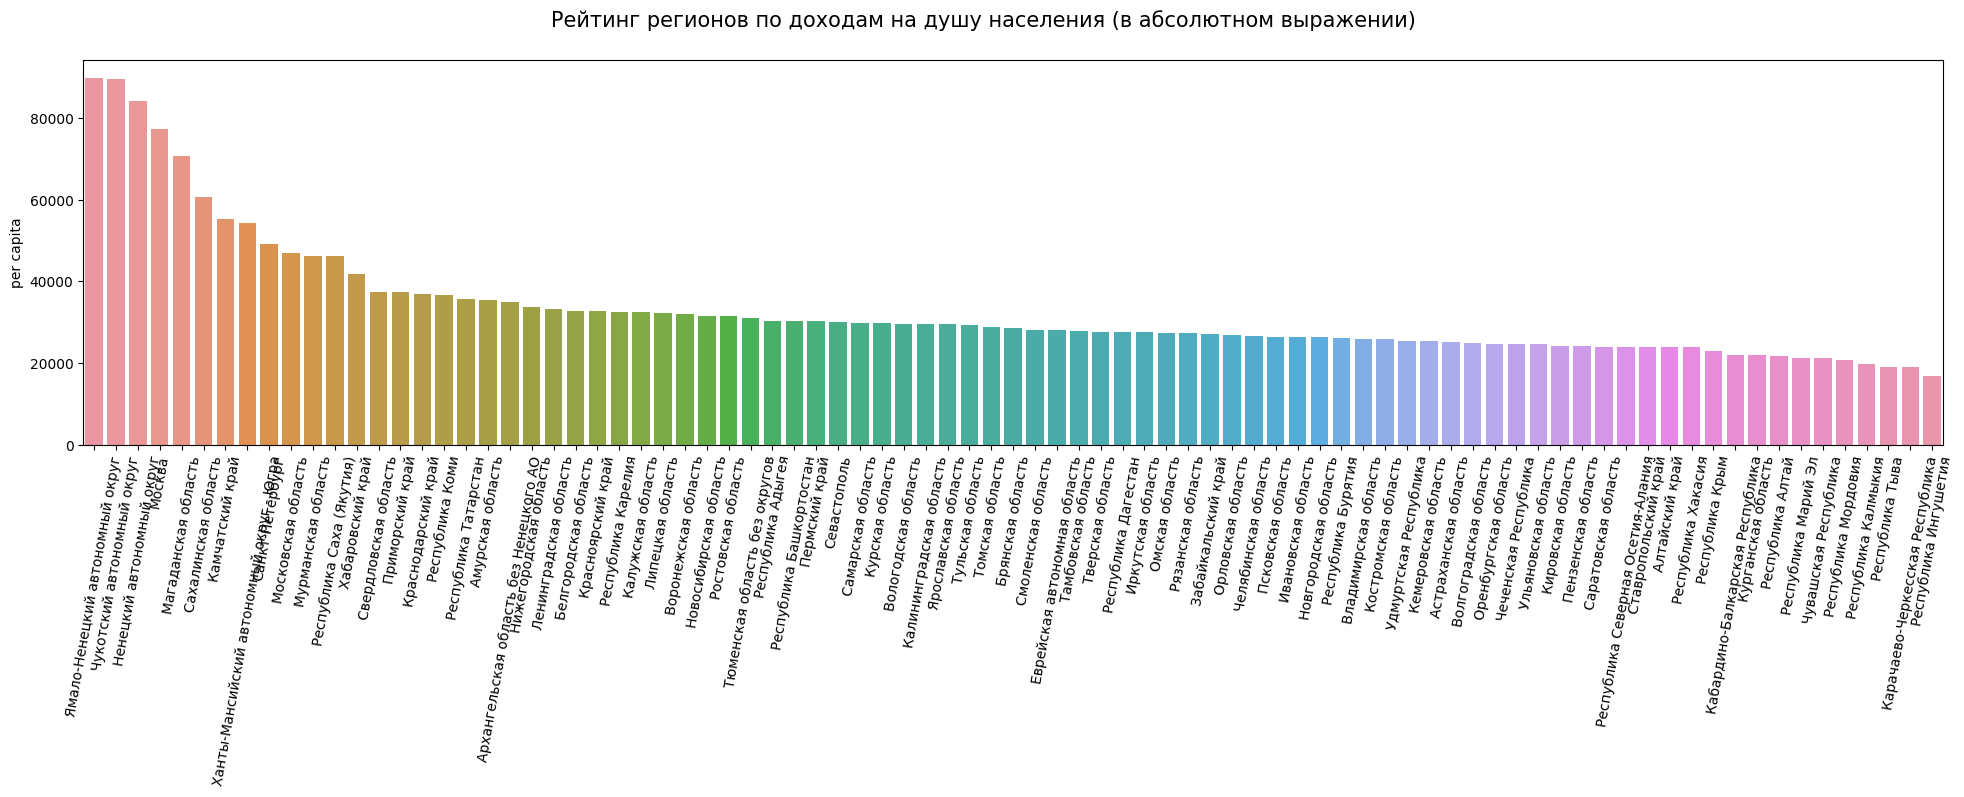

In [199]:
plot_df = model_df.sort_values(by='per capita', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=plot_df, x=plot_df.index, y='per capita')
fig.suptitle(
    'Рейтинг регионов по доходам на душу населения (в абсолютном выражении)',
    fontsize=15);
plt.xlabel('')
plt.xticks(rotation = 80);

Получилось, что наивысшим доходами обладают регионы связанные с топливно-энергетическим комплексом.

Скорректируем его на величину прожиточного минимума.

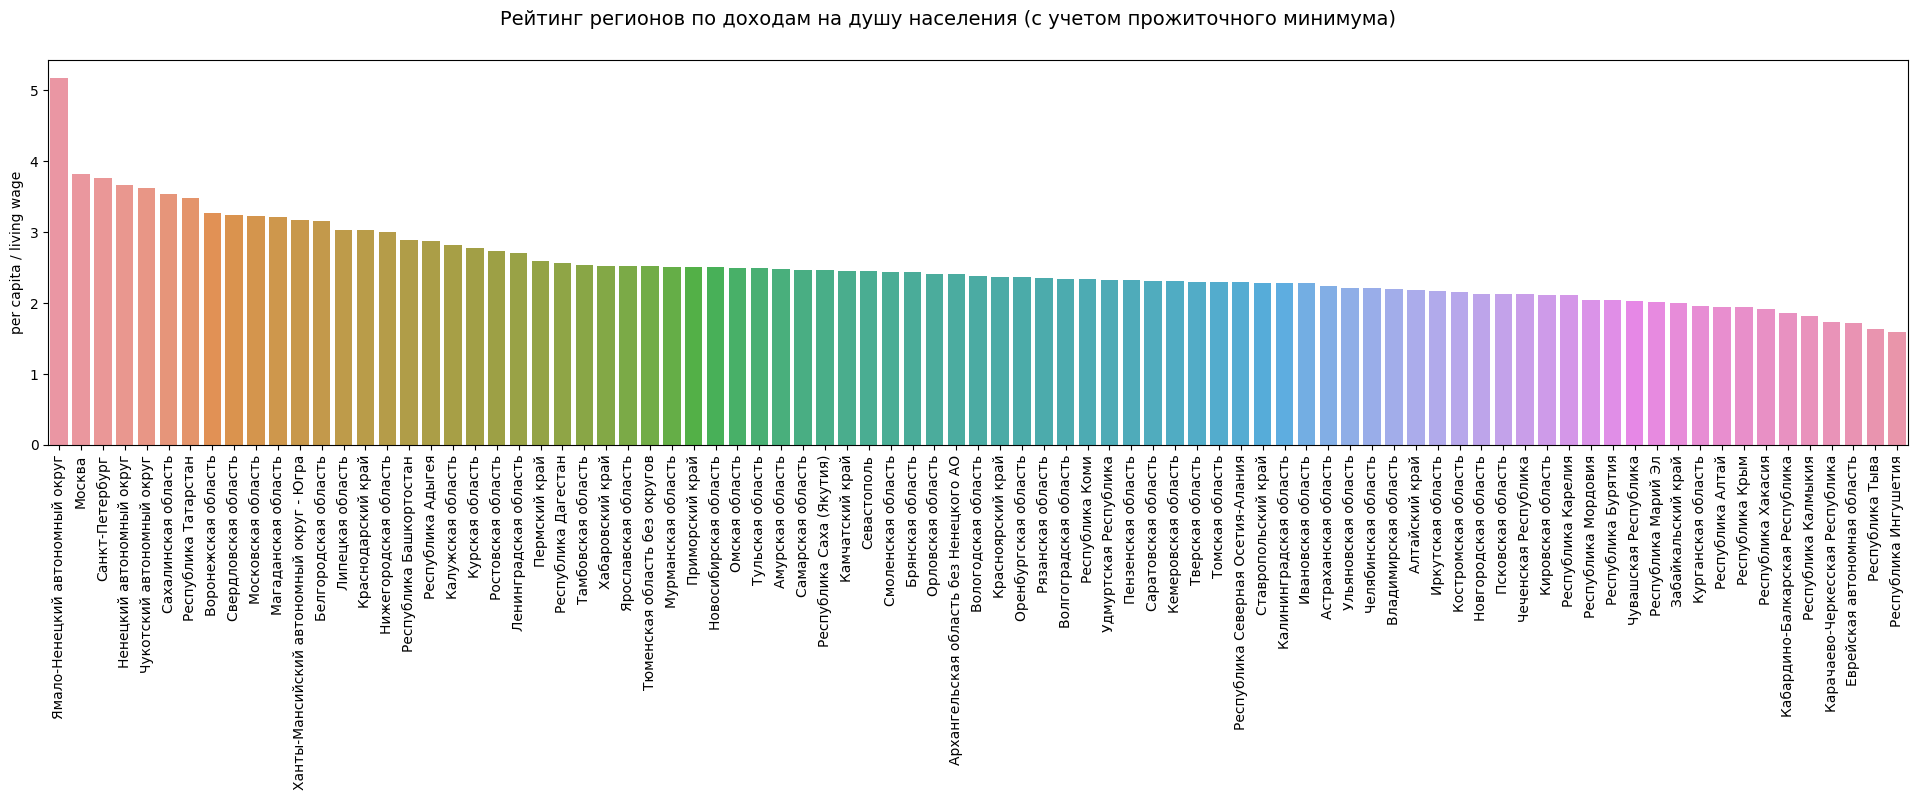

In [200]:
plot_df['per capita norm'] = plot_df['per capita'] / plot_df['living wage']
plot_df.sort_values(by='per capita norm', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=plot_df, x=plot_df.index, y='per capita norm')
fig.suptitle(
    'Рейтинг регионов по доходам на душу населения (с учетом прожиточного минимума)',
    fontsize=14);
plt.xlabel('')
plt.ylabel('per capita / living wage')
plt.xticks(rotation = 90);

Теперь посмотрим на регионы по обеченностью жилплощадью.
Проблема нехватки жилья существует как в наиболее экономически развитых районах так и других.

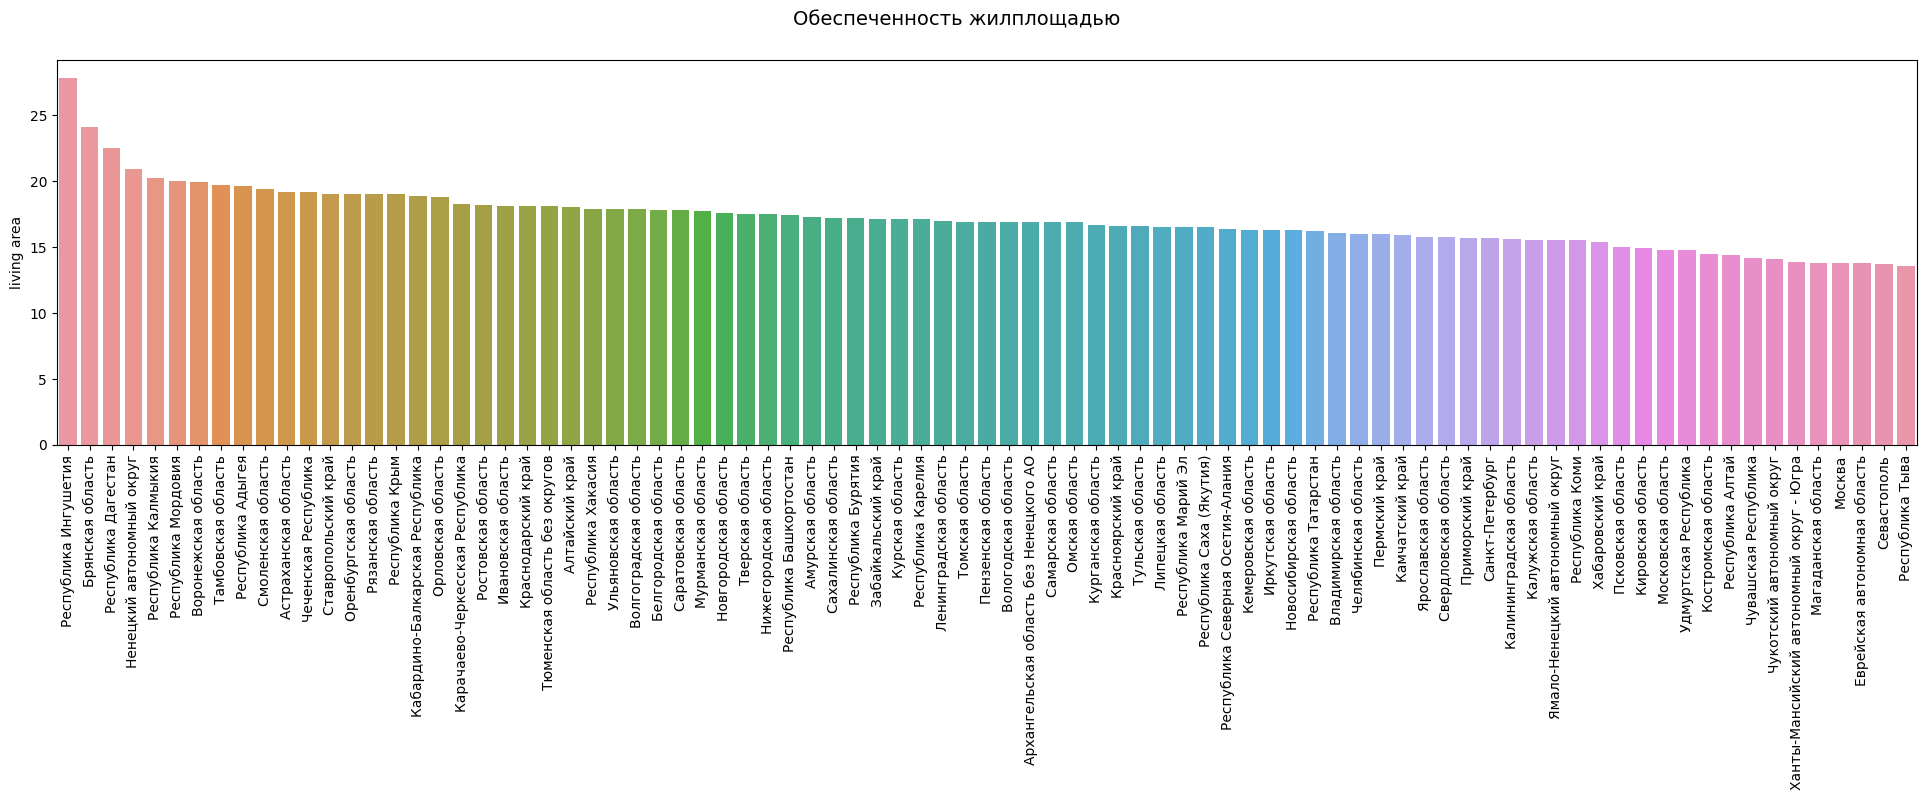

In [201]:
plot_df.sort_values(by='living area', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=plot_df, x=plot_df.index, y='living area')
fig.suptitle(
    'Обеспеченность жилплощадью',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Модернизируем модельный датасет: нормируем некоторые показатели на прожиточный минимум в регионе.

In [202]:
model_df['per capita norm'] = model_df['per capita'] / model_df['living wage']
model_df['formal wage norm'] = model_df['formal wage'] / model_df['living wage']
model_df['retail norm'] = model_df['retail'] / model_df['living wage']

model_df.drop(columns=['per capita', 'formal wage', 'retail'], axis=1, inplace=True)

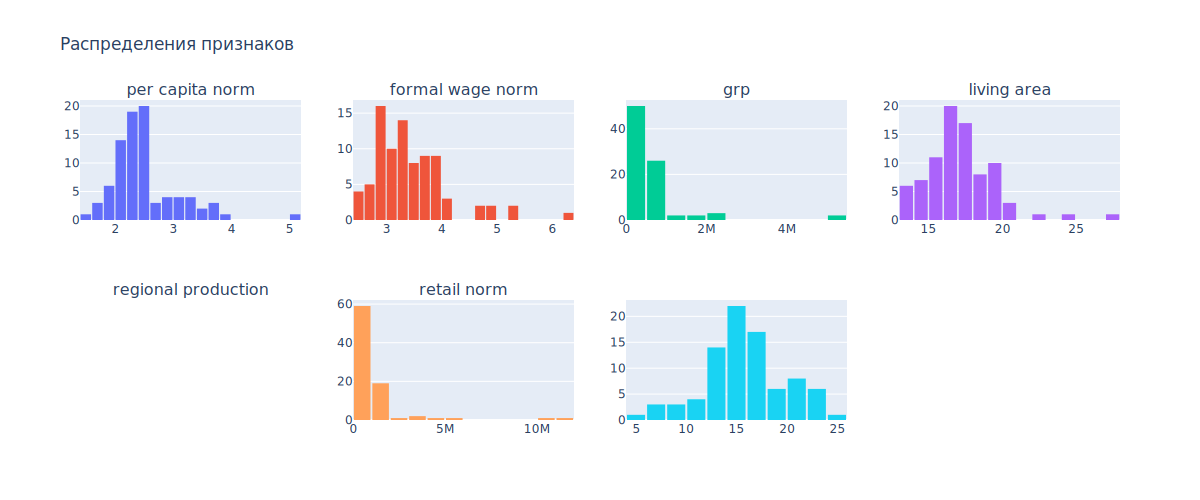

In [203]:
cols = ['per capita norm', 'formal wage norm', 'grp', 'living area', 
        'regional production', 'retail norm']
fig = make_subplots(rows=2, cols=4, subplot_titles=cols)
fig.add_trace(go.Histogram(x=model_df['per capita norm'], nbinsx=20),
              row=1, col=1)
fig.add_trace(go.Histogram(x=model_df['formal wage norm'], nbinsx=20),
              row=1, col=2)
fig.add_trace(go.Histogram(x=model_df['grp'], nbinsx=20),
              row=1, col=3)
fig.add_trace(go.Histogram(x=model_df['living area'], nbinsx=20),
              row=1, col=4)
fig.add_trace(go.Histogram(x=model_df['regional production'], nbinsx=20),
              row=2, col=2)
fig.add_trace(go.Histogram(x=model_df['retail norm'], nbinsx=20),
              row=2, col=3)
fig.update_layout(title='Распределения признаков', 
                  showlegend=False, width=1200, height=500)
fig.layout.bargap = 0.1
fig.show('svg')

Видно, что признаки 'grp', 'regional production'следует перевести в логарифмическую шкалу. Также отмечу, что в нашем проекте мы не можем исключать какие-либо экстремальные значения (выбросы), т.к. с высокой степенью уверенности имеющиеся численные оценки носят достаточно объективный характер, отбрасывать некоторые регионы бессмысленно с точки зрения достижения целей проекта, а приведение экстремальных значений к медиане способно значительно исказить объективную картину.

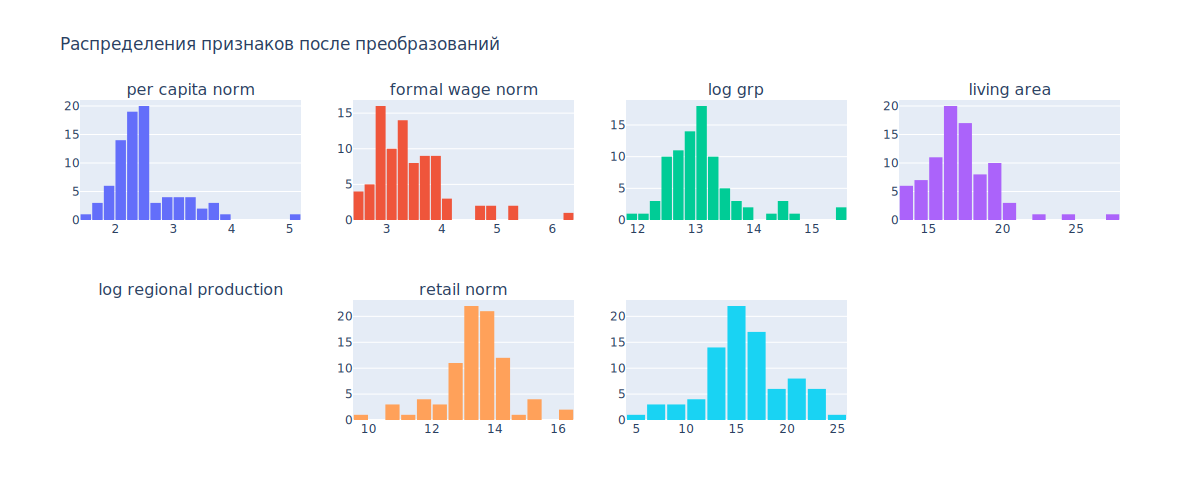

In [204]:
model_df['log grp'] = np.log(model_df['grp'])
model_df['log regional production'] = np.log(model_df['regional production'])
model_df.drop(columns=['grp', 'regional production'], axis=1, inplace=True)

cols = ['per capita norm', 'formal wage norm', 'log grp', 'living area', 
         'log regional production', 'retail norm']
fig = make_subplots(rows=2, cols=4, subplot_titles=cols)
fig.add_trace(go.Histogram(x=model_df['per capita norm'], nbinsx=20),
              row=1, col=1)
fig.add_trace(go.Histogram(x=model_df['formal wage norm'], nbinsx=20),
              row=1, col=2)
fig.add_trace(go.Histogram(x=model_df['log grp'], nbinsx=20),
              row=1, col=3)
fig.add_trace(go.Histogram(x=model_df['living area'], nbinsx=20),
              row=1, col=4)
fig.add_trace(go.Histogram(x=model_df['log regional production'], nbinsx=20),
              row=2, col=2)
fig.add_trace(go.Histogram(x=model_df['retail norm'], nbinsx=20),
              row=2, col=3)

fig.update_layout(title='Распределения признаков после преобразований', 
                  showlegend=False, width=1200, height=500)
fig.layout.bargap = 0.1
fig.show('svg')

Теперь необходимо выяснить относятся ли данные к нормальному распределению. Для этого проведем тест Шапиро.

In [205]:
for col in model_df.columns:
    _, p = shapiro(model_df[col])
    print(f'{col}:   p-value = {p:.3f}')

living area:   p-value = 0.000
living wage:   p-value = 0.000
per capita norm:   p-value = 0.000
formal wage norm:   p-value = 0.000
retail norm:   p-value = 0.597
log grp:   p-value = 0.000
log regional production:   p-value = 0.002


Тест Шапиро показал, что только признак 'retail norm' (розничная торговля) нормально распределен (p-value = 0.597).

### Корреляции, мультиколлинеарность

Так как  распределения далеки от нормальных, рассмотрим критерии Спирмена и Кендалла. Начнем с корреляционной матрицы.

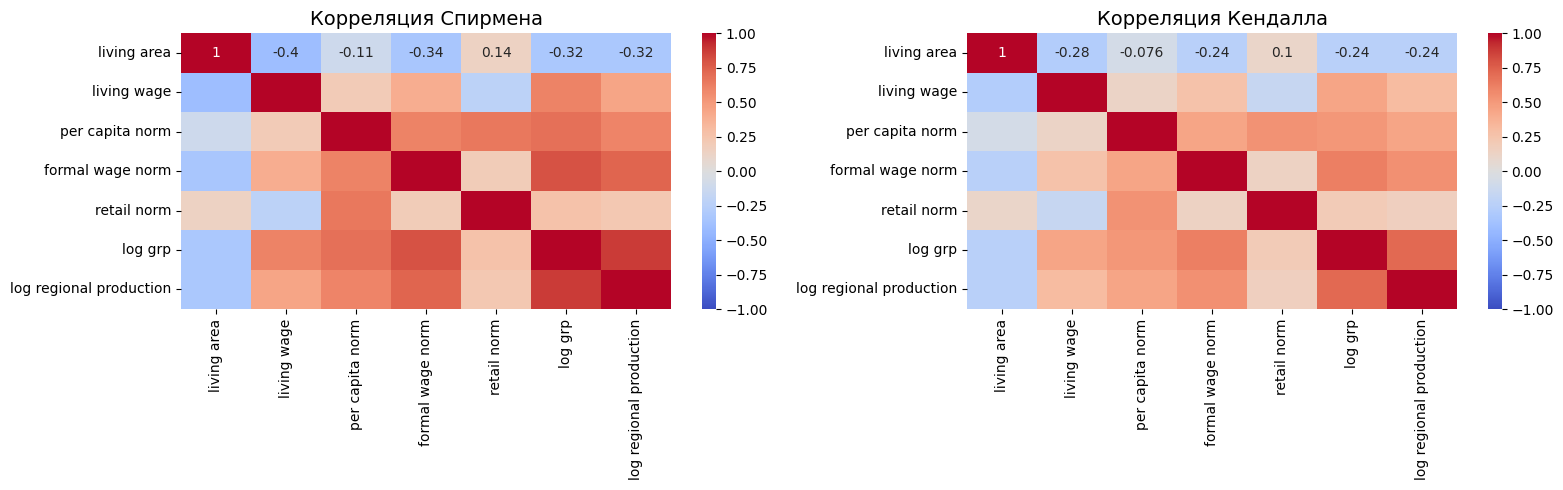

In [206]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.heatmap(model_df.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[0])
sns.heatmap(model_df.corr(method='kendall'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[1])
ax[0].set_title('Корреляция Спирмена', fontsize=14)
ax[1].set_title('Корреляция Кендалла', fontsize=14)
plt.tight_layout();



Получились высокая зависимость ВВП с производством в регионе.  По этой причине признаки-"дублеры" следует исключить. Часть признаков, где связь не столь очевидна, например валовый региональный продукт (log grp) и среднуюю зарплату (formal wage norm). Возможные "неприятности", связанные с наличием высокой корреляции, при кластеризации можно будет исключить путем использования PCA. 

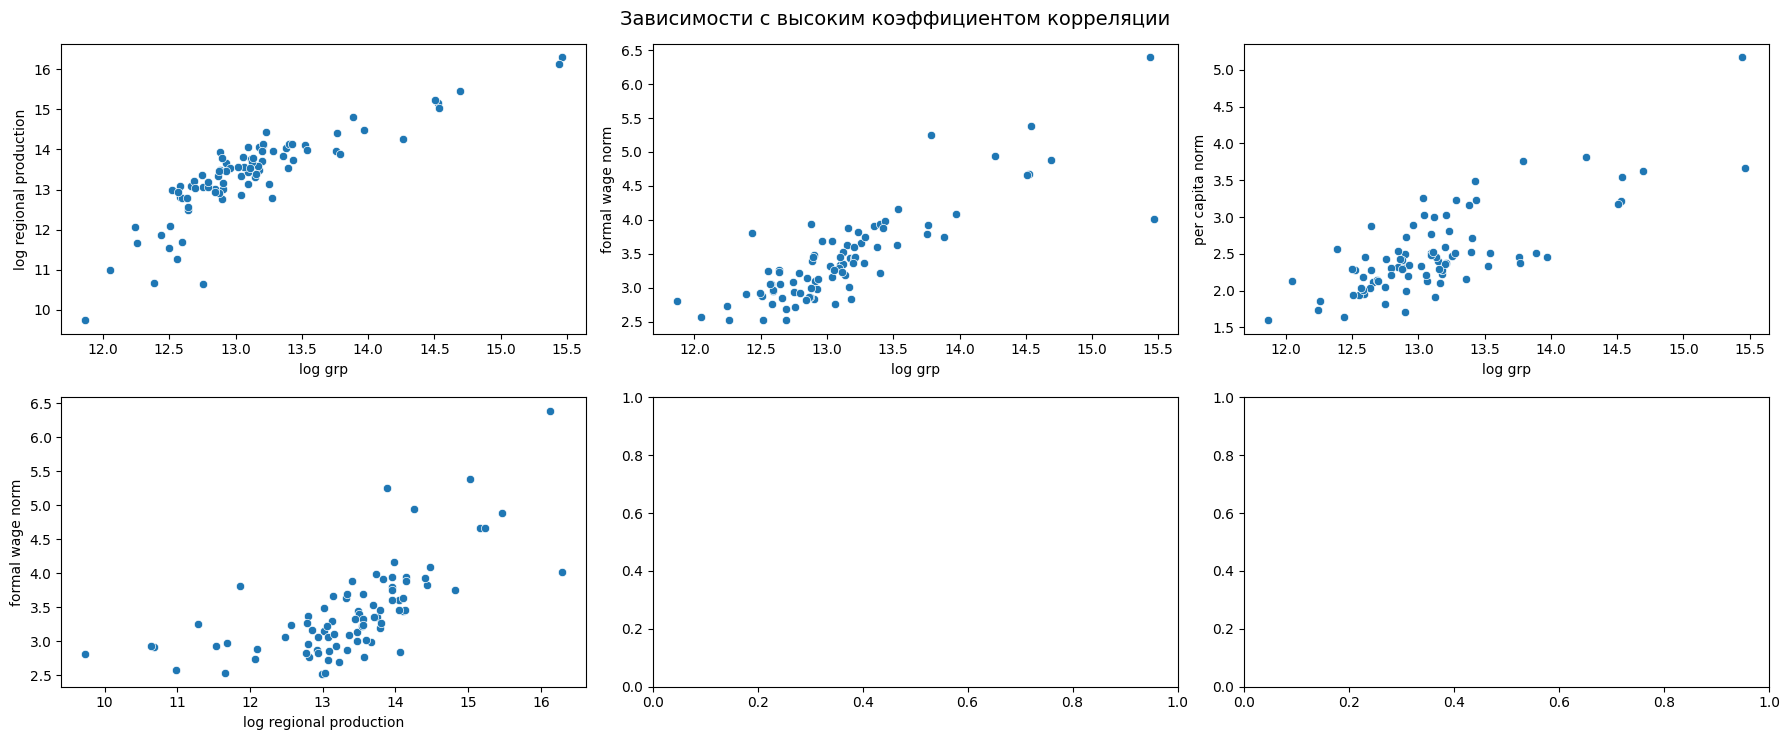

In [207]:
fig, ax = plt.subplots(2, 3, figsize=(18, 7.5))
sns.scatterplot(
    data=model_df, x= 'log grp', y ='log regional production', ax=ax[0, 0])
sns.scatterplot(
    data=model_df, x= 'log grp', y ='formal wage norm', ax=ax[0, 1])
sns.scatterplot(
    data=model_df, x= 'log grp', y ='per capita norm', ax=ax[0, 2])
sns.scatterplot(
    data=model_df, x= 'log regional production', y ='formal wage norm', ax=ax[1, 0])


plt.suptitle('Зависимости с высоким коэффициентом корреляции', fontsize=14)
plt.tight_layout();

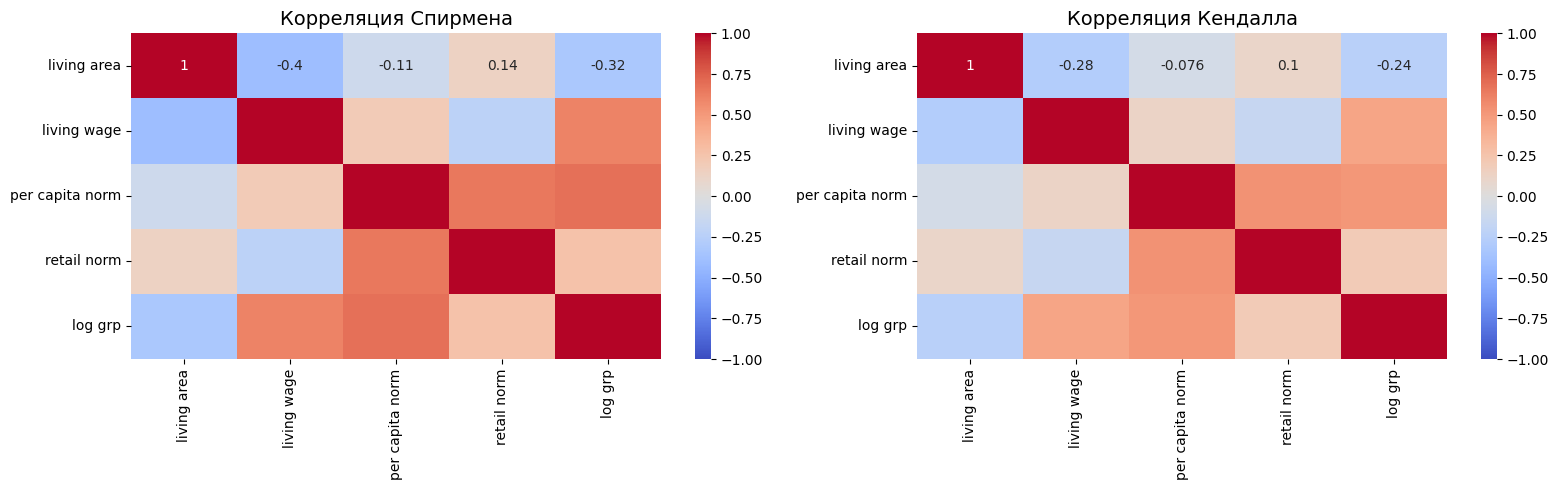

In [208]:
model_df.drop(
    columns=['log regional production', 'formal wage norm'], 
    axis=1, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.heatmap(model_df.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[0])
sns.heatmap(model_df.corr(method='kendall'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[1])
ax[0].set_title('Корреляция Спирмена', fontsize=14)
ax[1].set_title('Корреляция Кендалла', fontsize=14)
plt.tight_layout();

Масштабируем признаки по минимальным и максимальным значениям.

In [209]:
scaler = MinMaxScaler()
X = scaler.fit_transform(model_df)

### Кластеризация
#### Базовая модель: k-means
В качестве базовой модели используем k-means. Выбираем количество кластеров.

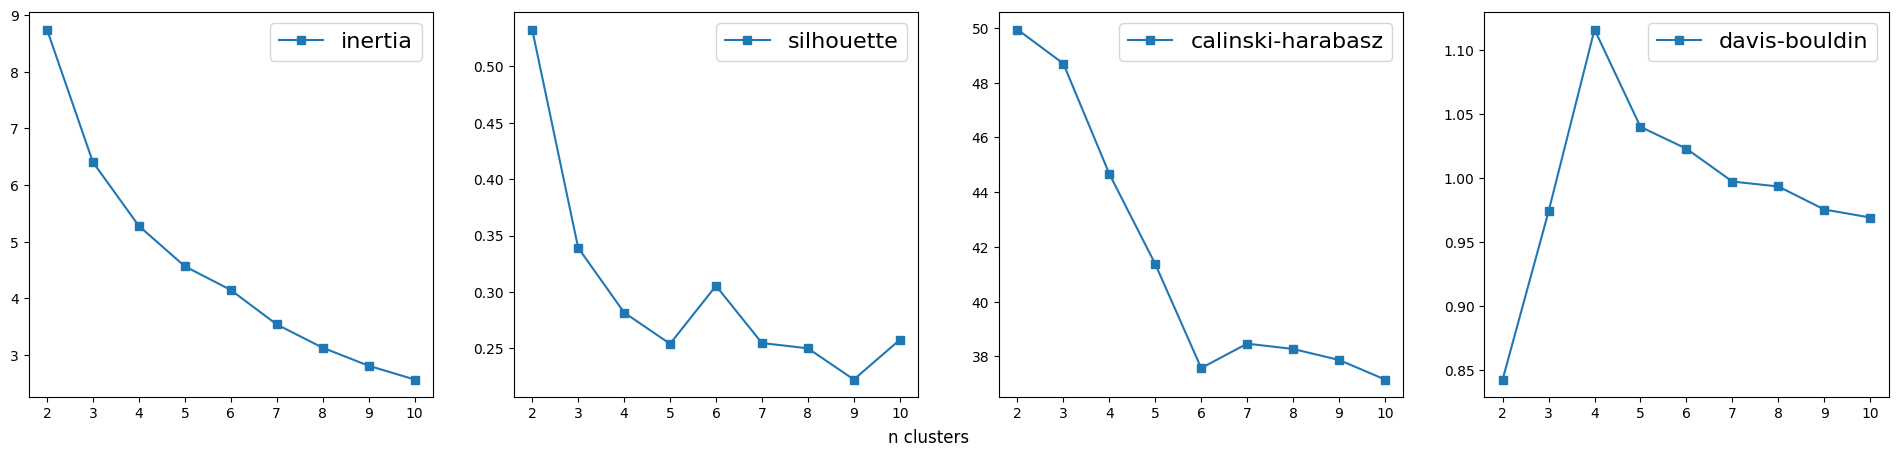

In [210]:
def plot_metrics(X):
    """Построbv метрики кластеризации в зависимости от количества кластеров"""
    inertia = [] #метод локтя 
    silhouette = []  #метод силуета
    calinski_harabasz = []
    davis_bouldin = []
    
    for n_cl in range(2, 11):
        kmeans = cluster.KMeans(n_clusters=n_cl, random_state=42)
        kmeans.fit(X)
    
        inertia.append(kmeans.inertia_)
        silhouette.append(metrics.silhouette_score(
            X, kmeans.labels_))
        calinski_harabasz.append(metrics.calinski_harabasz_score(
            X, kmeans.labels_))
        davis_bouldin.append(metrics.davies_bouldin_score(
            X, kmeans.labels_))
        
    fig, ax = plt.subplots(1, 4, figsize=(24,5))
    
    ax[0].plot(range(2, 11), inertia, 's-', label='inertia')
    ax[1].plot(range(2, 11), silhouette, 's-', label='silhouette')
    ax[2].plot(range(2, 11), calinski_harabasz, 's-', label='calinski-harabasz')
    ax[3].plot(range(2, 11), davis_bouldin, 's-', label='davis-bouldin')
    ax[0].legend(prop={'size': 16})
    ax[1].legend(prop={'size': 16})
    ax[2].legend(prop={'size': 16})
    ax[3].legend(prop={'size': 16});
    fig.supxlabel('n clusters')
    
        
plot_metrics(X)

Jриентируясь на метод локтя (inertia) и  критерий Дэвиса-Булдина, можно принять количество кластеров $n = 4$. В качестве графического представления результатов кластеризации используем t-SNE преобразование пятимерного признакового пространства на плоскость. Выводим значения метрик качества кластеризации.

Silhouette: 0.282
Calinski-Harabatz: 44.670
Davis-Bouldin: 1.116


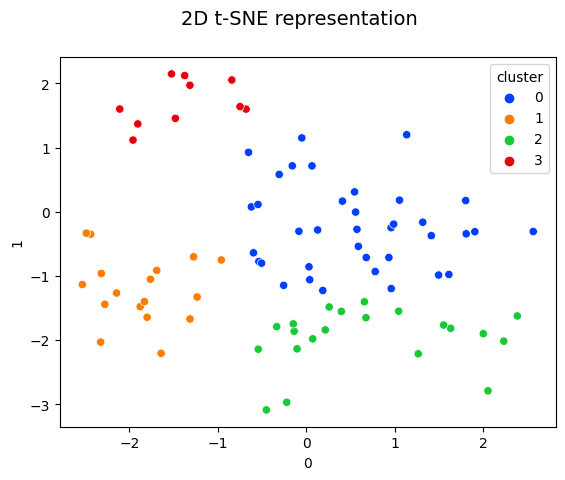

In [211]:
def plot_results(X, labels):
    "Построение двумерного представления t-SNE и расчетных показателей"
    tsne = TSNE(n_components=2, perplexity=50, init='pca',
                learning_rate='auto', random_state=42)
    df_tsne = pd.DataFrame(tsne.fit_transform(X))
    df_tsne['cluster'] = labels
    fig = plt.figure()
    sns.scatterplot(x=df_tsne[0], y=df_tsne[1],
                    hue=df_tsne['cluster'], palette='bright')
    fig.suptitle('2D t-SNE representation', fontsize=14);

    print('Silhouette: {:.3f}'.format(
        metrics.silhouette_score(X, labels)))
    print('Calinski-Harabatz: {:.3f}'.format(
        metrics.calinski_harabasz_score(X, labels)))
    print('Davis-Bouldin: {:.3f}'.format(
        metrics.davies_bouldin_score(X, labels)))
        

kmeans = cluster.KMeans(n_clusters=4, random_state=42)
bm_labels = kmeans.fit_predict(X)
plot_results(X, bm_labels)

#### Понижение размерности. PCA + k-means

Число главных компонент: 3


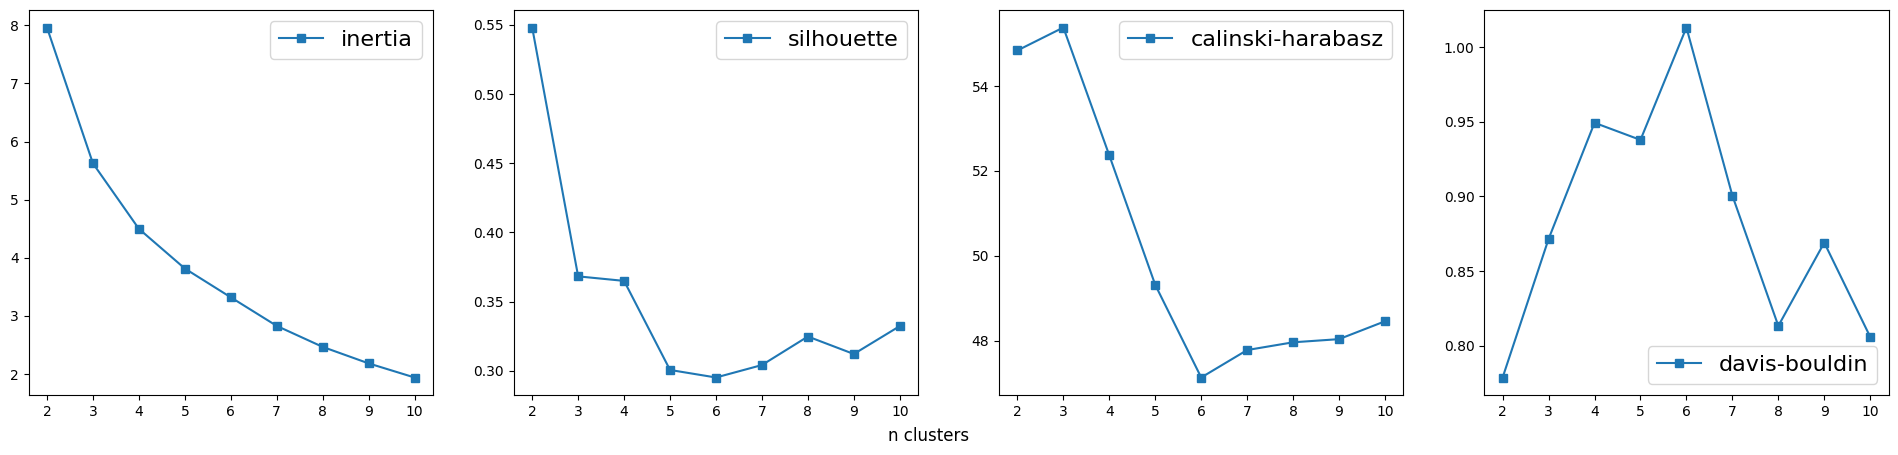

In [212]:
pca = PCA(n_components=0.9)  # 90% of explained dispersion
X_pca = pca.fit_transform(X)
print(f'Число главных компонент: {pca.n_components_}')

plot_metrics(X_pca)

Индекс Калински-Харабаша показывает максимум при количестве кластеров $n=3$, однако по методу локтя  лучше оставить $n=4$. 

Silhouette: 0.365
Calinski-Harabatz: 52.365
Davis-Bouldin: 0.949
Rand score (сравнение с базовой моделью): 0.847899


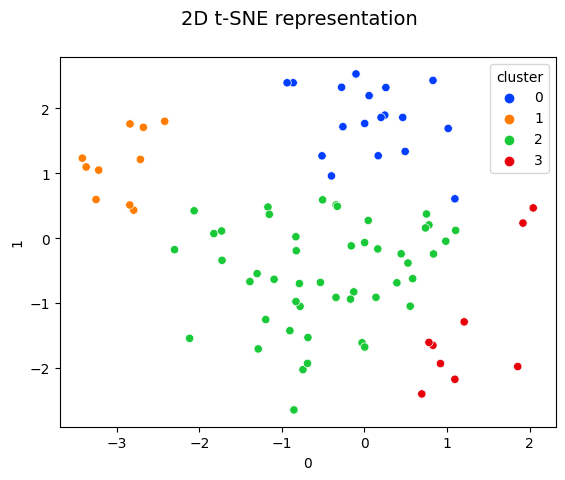

In [213]:
kmeans_pca = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit_predict(X_pca)
plot_results(X_pca, kmeans_pca.labels_)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, kmeans_pca.labels_)))

Silhouette: 0.368
Calinski-Harabatz: 55.381
Davis-Bouldin: 0.872
Rand score (сравнение с базовой моделью): 0.782913


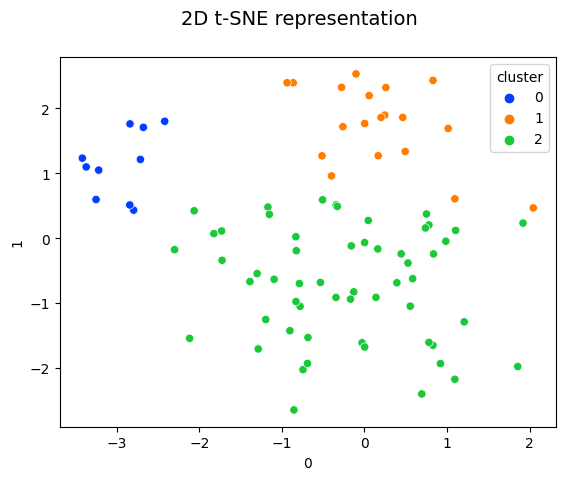

In [214]:
kmeans_pca = cluster.KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit_predict(X_pca)
plot_results(X_pca, kmeans_pca.labels_)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, kmeans_pca.labels_)))

Посмотрим на данные с точки зрения различных алгоритмов кластеризации.
Рассмотрим Гауссову смесь.

Silhouette: 0.382
Calinski-Harabatz: 53.207
Davis-Bouldin: 0.838
Rand score (сравнение с базовой моделью): 0.723529


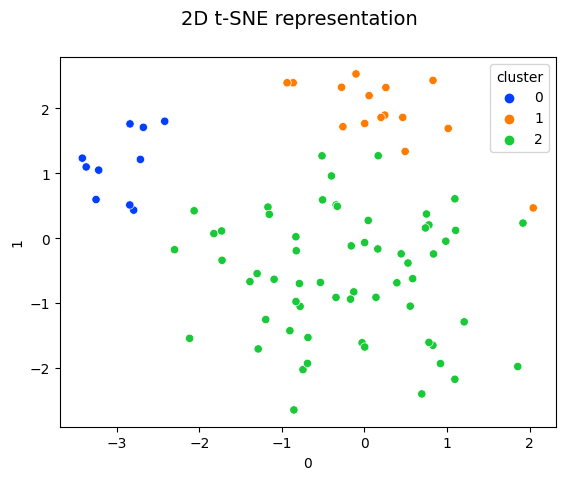

In [215]:
gmix = GaussianMixture(
    n_components=3, random_state=42, covariance_type='tied')
labels = gmix.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

Агломеративная кластеризация

Silhouette: 0.377
Calinski-Harabatz: 54.102
Davis-Bouldin: 0.801
Rand score (сравнение с базовой моделью): 0.741457


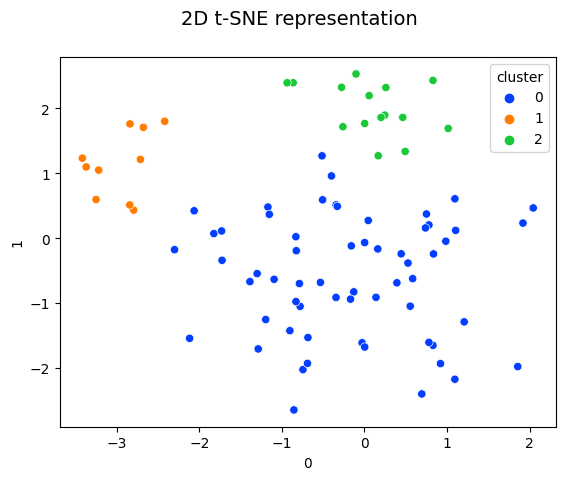

In [216]:
tree_like = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = tree_like.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

Спектральная кластеризация 

Silhouette: 0.368
Calinski-Harabatz: 55.381
Davis-Bouldin: 0.872
Rand score (сравнение с базовой моделью): 0.782913


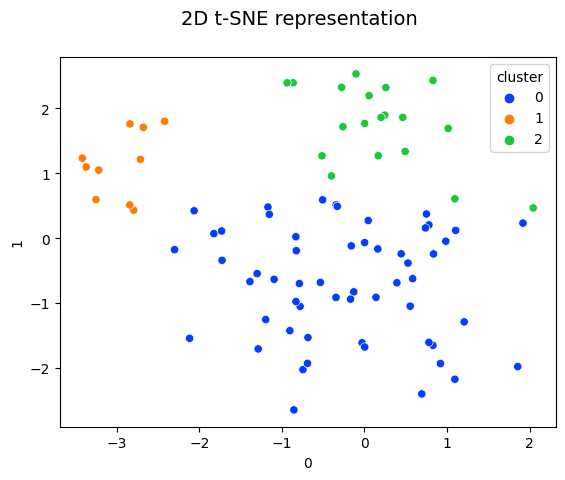

In [217]:
spectral = cluster.SpectralClustering(n_clusters=3)
labels = spectral.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

**Выводы по результатам тестирования и валидации**

Таким образом получилось что результаты  кластеризации в пространстве PCA-компонент и спектральной кластеризации совпадают.
Кроме того  индексы Рэнда при сравнении с базовой моделью остаются достаточно высокими, что говорит об устойчивости общей структуры распределения объектов по кластерам при использовании разных алгоритмов. Вариации индекса Рэнда объясняются различными перераспределениями "граничных" (между кластерами) точек. Таким образом, можно констатировать, что общая структура полученных кластеров в достаточной мере устойчива. 

In [218]:
# Кластеризации в пространстве PCA-компонент или спектральная кластеризация , наилучший вариант.

spectral = cluster.SpectralClustering(n_clusters=3)
labels_gmix = spectral.fit_predict(X_pca)
df['cluster'] = labels_gmix

fig = px.scatter_3d(
    x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    title='Кластеры в пространстве трех главных компонент (PCA)',
    color=df['cluster'], width=650, height=400)
fig.update_traces(marker={'size':3}, marker_line_width=0.5)
print(df['cluster'].value_counts().sort_index())
fig.show()


cluster
0    56
1    19
2    10
Name: count, dtype: int64


### Вывод

Из ранее подготовленного датасета данных по российским регионам в качестве критериев для последующей их группировки в кластеры с близкими параметрами выбраны признаки, отражающие социально-экономическое благополучие субъектов федерации. Построены рейтинги регионов по избранным показателям. Исследованы распределения выбранных признаков и корреляции между ними, произведен отбор и выполнены необходимые преобразования. Итоговый модельный датасет для проведения кластеризации включает в себя 5 независимых характеристик: 
- номинальную заработную плату, нормированную на прожиточный минимум в регионе;
- валовый региональный продукт в логарифмической шкале;
- объем розничной торговли на человека, нормированный  на прожиточный минимум в регионе;
- жилую площадь на человека;
- прожиточный минимум.

С помощью различных внутренних метрик кластеризации оценено оптимальное количество кластеров (три). Построена базовая модель (k-means). Выполнено PCA-понижение размерности (3 главных компоненты, объясняющие 90% дисперсии). Протестированы различные алгоритмы кластеризации, из них на основе метрик и визуализации признакового пространства выбран оптимальный ("k-means на PCA-компонентах"), регионам присвоены соответствующие метки. Продемонстрирована устойчивость общей структуры кластеров при использовании различных алгоритмов кластеризации. 


## Часть 3. Анализ результатов кластеризации

Рассмотрим отличия кластеров по использованным характеристикам с помощью полярной диаграммы по медианным значениям.

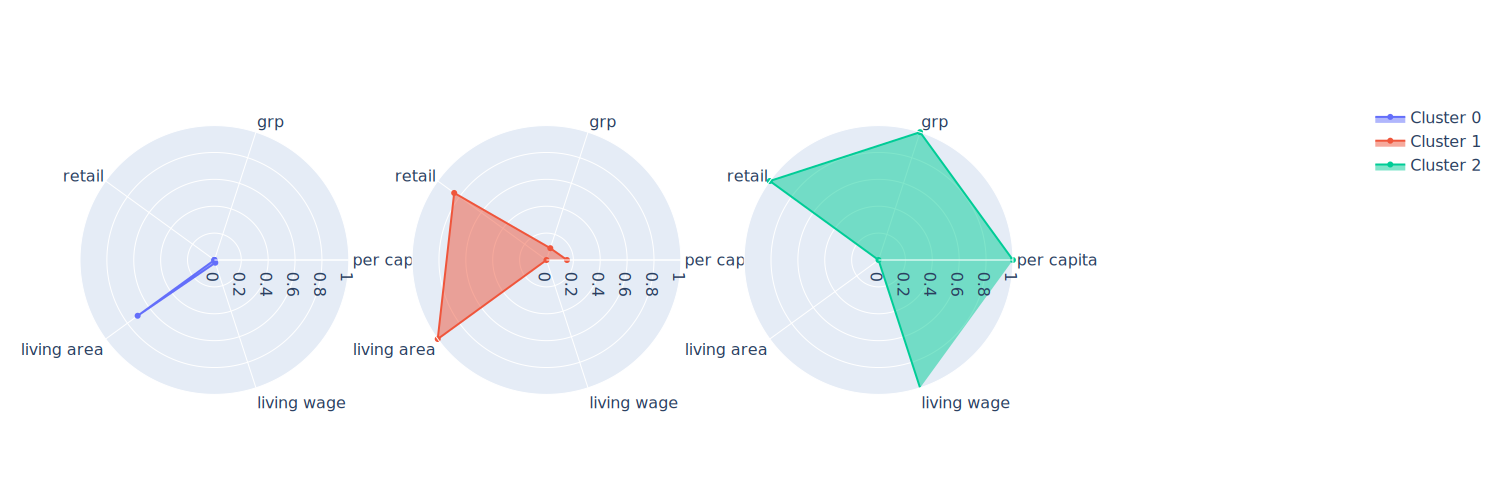

In [219]:
cols = ['per capita', 'grp', 'retail', 'living area', 'living wage']
medians = df.groupby('cluster')[cols].median()
# medians

features = medians.columns
scaler = MinMaxScaler()
medians_scaled = pd.DataFrame(scaler.fit_transform(medians), 
                              columns=features)
fig = make_subplots(rows=1, cols=4, specs=[[{'type': 'polar'}]*4]*1)

fig.add_trace(go.Scatterpolar(  
    name = 'Cluster 0',
    r = medians_scaled.loc[0].values,
    theta = features,
    fill='toself',
    ), 1, 1)

fig.add_trace(go.Scatterpolar(
    name = 'Cluster 1',
    r = medians_scaled.loc[1].values,
    theta = features,
    fill='toself'
    ), 1, 2)

fig.add_trace(go.Scatterpolar(
    name = 'Cluster 2',
    r = medians_scaled.loc[2].values,
    theta = features,
    fill='toself'
    ), 1, 3)

fig.update_polars(radialaxis=dict(range=[0, 1]))
fig.update_layout(
    font_size=16,
    showlegend=True, # отображение легенды
    autosize=False, # устаналиваем свои размеры графика
    width=1500, 
    height=500) 
fig.show('svg')

In [220]:
columns = russia_regions_2020.columns
medians = df.groupby('cluster')[columns].median()
display('Медианные значения', medians)

'Медианные значения'

,per capita,formal wage,child mortality,disabled,alco (2018),drug (2018),grp,living area,bad conditions,no funds,...,population,poverty %,children,retired,employable,children %,retired %,regional production,retail,living wage
cluster,,,,,,,,,,,,,,,,,,,,,
0,26180.0,36173.0,45.5,77581.5,64.4,8.35,392048.55,16.9,1.20,0.51675,...,1100635.5,14.60,39.00,4.7,55.75,21.149426,25.05,5.212596e+05,173947.0,11666.0
1,32226.0,38499.0,71.0,200755.0,50.2,7.0,541930.20,17.4,0.70,0.76360,...,2324205.0,9.70,39.30,4.7,54.80,18.968697,26.60,9.371241e+05,237008.0,11493.0
2,65817.0,92377.5,25.0,17633.5,100.4,6.2,2014818.65,15.7,2.15,1.89165,...,516350.5,8.55,40.95,4.7,53.15,23.481354,19.30,3.593909e+06,248248.0,19556.5


In [221]:
df[df['cluster'] == 0].index

Index(['Алтайский край', 'Амурская область',
       'Архангельская область без Ненецкого АО', 'Астраханская область',
       'Владимирская область', 'Волгоградская область', 'Вологодская область',
       'Еврейская автономная область', 'Забайкальский край',
       'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Карачаево-Черкесская Республика', 'Кемеровская область',
       'Кировская область', 'Костромская область', 'Красноярский край',
       'Курганская область', 'Новгородская область', 'Новосибирская область',
       'Омская область', 'Оренбургская область', 'Орловская область',
       'Пензенская область', 'Приморский край', 'Псковская область',
       'Республика Алтай', 'Республика Бурятия', 'Республика Дагестан',
       'Республика Ингушетия', 'Республика Калмыкия', 'Республика Карелия',
       'Республика Коми', 'Республика Крым', 'Республика Марий Эл',
       'Республика Мордовия', 'Республика Северная Ос

***Кластер 0***  -- наиболее наполненный кластер "среднестатистических регионов". Медианные показатели (в расчете на одного человека): 
- зарплата 36 тыс руб,
- прожиточный минимум 11,6 тыс руб,
- жилплощадь около 16,9 кв.м, 
- населения за чертой бедности 14,6 %

In [222]:
df[df['cluster'] == 1].index 

Index(['Белгородская область', 'Брянская область', 'Воронежская область',
       'Калужская область', 'Краснодарский край', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Московская область',
       'Нижегородская область', 'Пермский край', 'Республика Адыгея',
       'Республика Башкортостан', 'Республика Татарстан', 'Ростовская область',
       'Санкт-Петербург', 'Свердловская область', 'Тамбовская область',
       'Тюменская область без округов'],
      dtype='object', name='region')

***Кластер 1***  -- регионы с более комфортны для проживания. Медианные показатели (в расчете на одного человека): 
- зарплата 38 тыс руб,
- прожиточный минимум 11,5 тыс руб,, 
- жилплощадь около 17,4 кв.м, 
- населения за чертой бедности 9,7 %

In [223]:
df[df['cluster'] == 2].index

Index(['Камчатский край', 'Магаданская область', 'Москва',
       'Мурманская область', 'Ненецкий автономный округ',
       'Республика Саха (Якутия)', 'Сахалинская область',
       'Ханты-Мансийский автономный округ - Югра',
       'Чукотский автономный округ', 'Ямало-Ненецкий автономный округ'],
      dtype='object', name='region')

***Кластер 2***  -- либо бизнес регионы либо регионы с предприятиями ресурсодобывающего сектора . Медианные показатели (в расчете на одного человека): 
- зарплата 92 тыс руб,
- прожиточный минимум 19,5  тыс руб,, 
- жилплощадь около 15 кв.м, 
- населения за чертой бедности 8,5 %

## Описание группы населения, сталкивающиеся с бедностью

Мы имеем статистику о распределении малоимущего населения по социально-демографическим группам.


In [224]:
cols = poverty_socdem.columns
df[cols].mean()

children      39.056471
retired        4.996471
employable    55.783529
dtype: float64

Среди малоимущего населения - основная группа это люди трудоспособного возраста (56%) и дети (39%). На пенсионеров приходится около 5%. Однако эти показатели ничего не говорят о проценте малоимущих внутри каждой из социально-демографических групп (например сколько процентов пенсионеров находятся за чертой бедности). Для этого необходимы доп данные о составе населения страны (количестве детей, трудоспособных, пенсионеров).

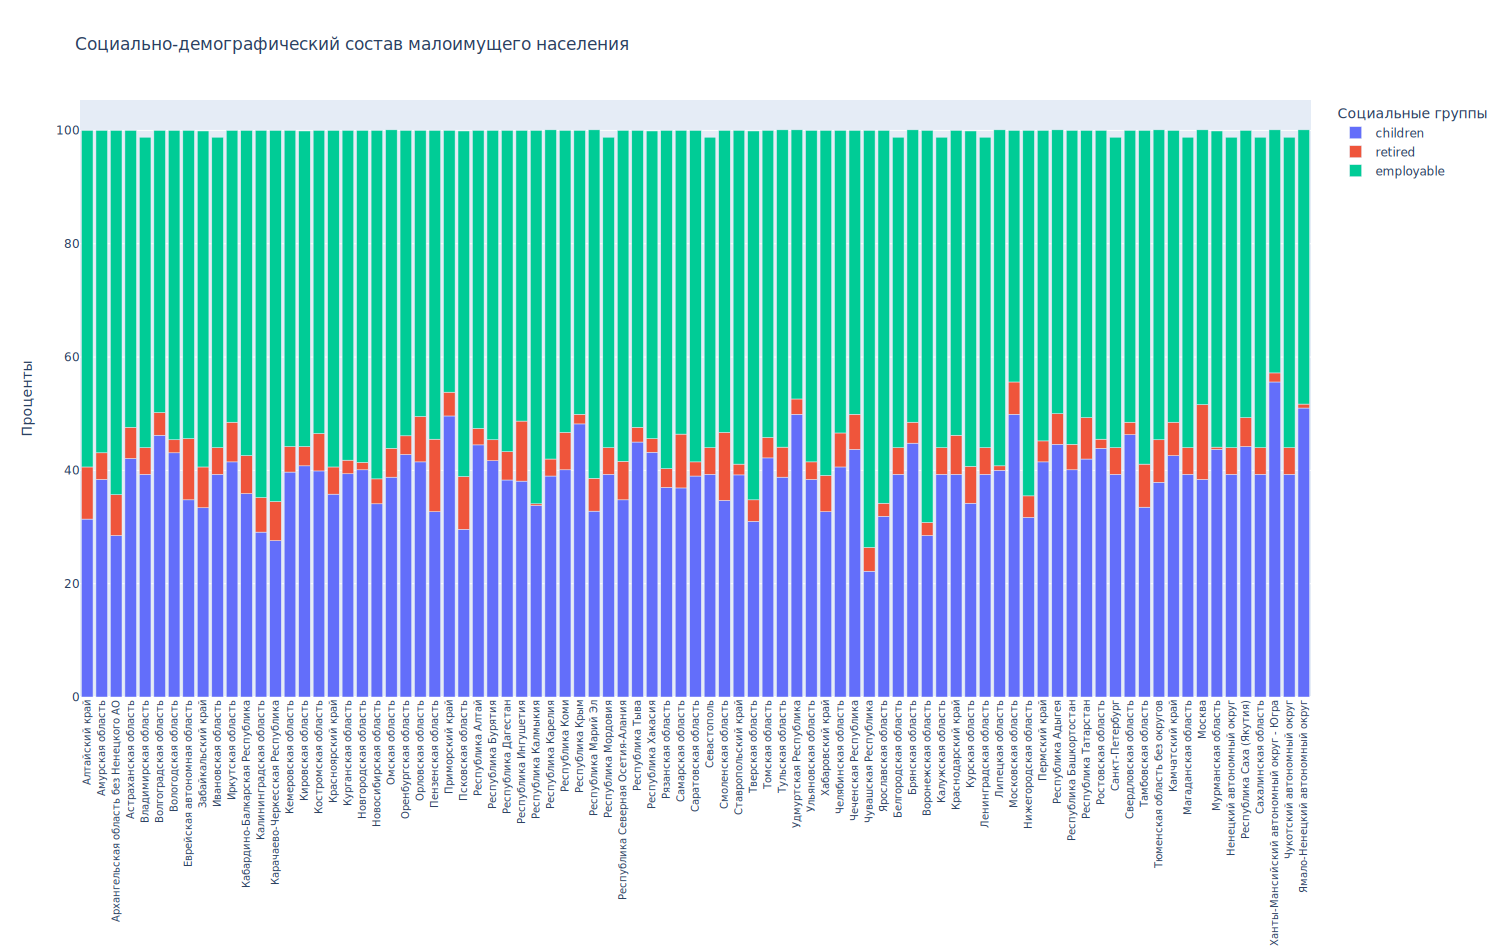

In [225]:
plot_df = df.sort_values(by=['cluster', 'region'])[cols].rename({
    'the poor: children': 'дети',
    'the poor: employable': 'трудоспособные',
    'the poor: retired': 'пенсионеры' 
}, axis=1)
fig = px.bar(plot_df, width=1500, height=950,
    title='Социально-демографический состав малоимущего населения')
fig.layout.xaxis.tickfont.size = 10
fig.update_xaxes(tickangle=270, title=None)
fig.update_yaxes(title='Проценты')
fig.layout.legend.title = 'Социальные группы'
fig.show('svg')

Теперь рассмотрим  эту статистику по регионам (дополнительно они упорядочены по кластерам слева направо). Некоторые вариации присутствуют, однако существенных отличий между регионами, а также между кластерамии (левая и правая части графика) не наблюдается. 

Рассчитаем процент малоимущих в социально-демографических группах.

In [231]:
socgroups = df[[
    'population', 'poverty %', 'children',
    'retired', 'employable', 
    'children %', 'retired %']].copy()

# Процент трудоспособных
socgroups['employable %'] = (
    100 - socgroups['children %'] - socgroups['retired %']) 

# Количество малоимущих
socgroups['the poor'] = (socgroups['population'] 
    * socgroups['poverty %'] / 100).round(0).astype(int)  

# Количество людей в социально-демографических группах
socgroups['children_all'] = (
    (socgroups['population'] * socgroups['children %'] / 100)
    .round(0).astype(int))  

socgroups['retired_all'] = (
    (socgroups['population'] * socgroups['retired %'] / 100)
    .round(0).astype(int))  

socgroups['employable_all'] = (
    (socgroups['population'] * socgroups['employable %'] / 100)
    .round(0).astype(int))  

# Количество малоимущих в социально-демографических группах
socgroups['poor children'] = (  
    (socgroups['the poor'] * socgroups['children'] / 100)
    .round(0).astype(int))
socgroups['poor employable'] = (  
    (socgroups['the poor'] * socgroups['employable'] / 100)
    .round(0).astype(int))   
socgroups['poor retired'] = (  
    (socgroups['the poor'] * socgroups['retired'] / 100)
    .round(0).astype(int))    

# Процент малоимущих в социально-демографических группах
socgroups['poor children %'] = (
    (socgroups['poor children'] / socgroups['children_all'] * 100))  
socgroups['poor employable %'] = (  
    (socgroups['poor employable'] / socgroups['employable_all'] * 100))  
socgroups['poor retired %'] = ( 
    (socgroups['poor retired'] / socgroups['retired_all'] * 100))  

# Среднее по РФ
cols =[
    'poor children %',
    'poor employable %', 
    'poor retired %']
poor_percent = socgroups[cols].mean()
poor_percent

poor children %      24.651642
poor employable %    14.418410
poor retired %        3.214568
dtype: float64

в среднем по стране за чертой бедности находятся 24% детей, 14% трудоспособного населения и около 3% пенсионеров. Данная статистика свидетельствует о том, что малоимущими чаще оказываются семьи с детьми - видим большой процент малоимущих среди детей при гораздо меньшем проценте малоимущих среди трудоспособного населения. При этом трудоспособные составляют 56% малоимущего населения - больше чем дети (39%), т.е. многие из малоимущих оказываются в бедственном положении уже при рождении первого ребенка (т.к. оба родителя переходят в разряд малоимущих). 

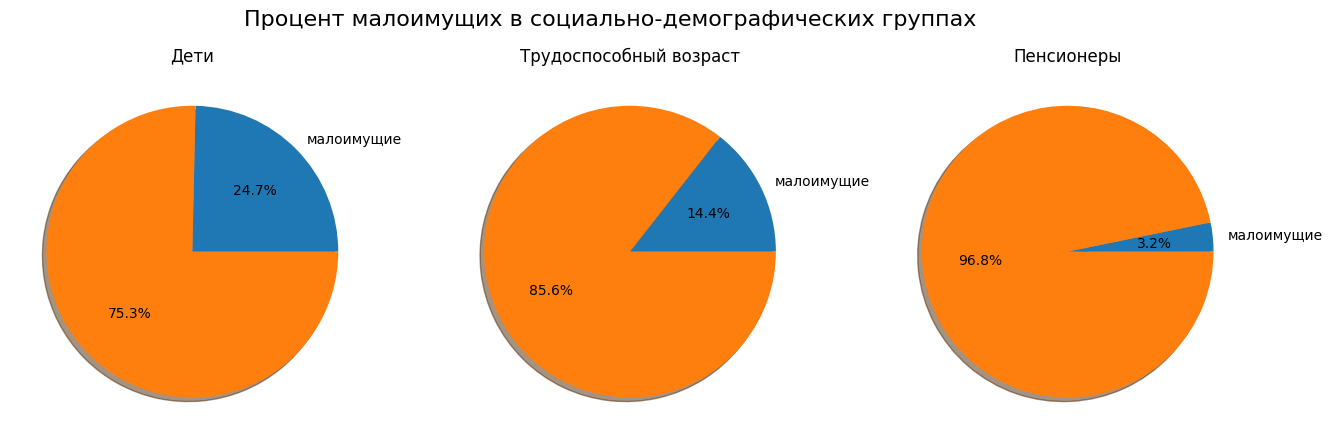

In [232]:
labels = ['малоимущие', '']
fig, ax = plt.subplots(1, 3, figsize=(16,5))
ax[0].pie([poor_percent[0], 100-poor_percent[0]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[1].pie([poor_percent[1], 100-poor_percent[1]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[2].pie([poor_percent[2], 100-poor_percent[2]], 
          labels=labels, autopct='%1.1f%%', shadow=True);
ax[0].set_title('Дети')
ax[1].set_title('Трудоспособный возраст')
ax[2].set_title('Пенсионеры')
fig.suptitle('Процент малоимущих в социально-демографических группах', fontsize=16)
fig.set_facecolor('white');

In [238]:
socgroups['cluster'] = df['cluster']
cluster_socgroups = (socgroups
    .groupby('cluster')[['children_all', 'employable_all', 'retired_all', 'poor children',	
                         'poor employable', 'poor retired']].sum())

cluster_socgroups['poor children %'] = (cluster_socgroups['poor children'] 
                                        / cluster_socgroups['children_all'] * 100)  
cluster_socgroups['poor employable %'] = (cluster_socgroups['poor employable'] 
                                  / cluster_socgroups['employable_all'] * 100)  
cluster_socgroups['poor retired %'] = (cluster_socgroups['poor retired'] 
                                       / cluster_socgroups['retired_all'] * 100) 
cluster_socgroups

,children_all,employable_all,retired_all,poor children,poor employable,poor retired,poor children %,poor employable %,poor retired %
cluster,,,,,,,,,
0,16148447,40308045,18434617,4274459,6262826,578532,26.469784,15.537409,3.138291
1,10840362,29468194,13902505,2064530,2748364,229856,19.044844,9.326544,1.653342
2,3381563,9979870,4284987,532938,624266,117140,15.760109,6.255252,2.733731


Если посмотреть на данные показатели по кластерам то можно отметить также значительно больший процент малоимущих детей и работоспособного населения в большинстве регионов, а вот число пенсионеров особо не меняется.

### Вывод

Дано описание характерных особенностей полученных кластеров:

- среднестатистические регионы;
- регионы "комфорт"
- бизнес-регионы.

Проведен анализ социально-демографических групп населения, показывающий, что наиболее уязвимой группой населения по финасовым показателям являются семьи с детьми. 
